In [21]:
import sys
import os
sys.path.append(os.path.abspath('..'))

import data_gen as dg
import ising as isg

import jax
import jax.numpy as jnp
import optax
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def langevin_step(samples, theta, eps, key):
    
    mu, var = theta[0], theta[1]

    noise = jax.random.normal(key, shape=samples.shape)
    grad_V = (samples - mu) / var

    return samples - eps * grad_V + jnp.sqrt(2 * eps) * noise

In [23]:
def evolve_langevin(samples, theta, counter, eps=1e-2, n_evolution=1, seed=0):

    key = jax.random.PRNGKey(seed + counter)
    samples_evolved = samples

    for i in range(n_evolution):
        key, subkey = jax.random.split(key)
        samples_evolved = langevin_step(samples_evolved, theta, eps, subkey)

    return samples_evolved

In [24]:
from ott.tools import sinkhorn_divergence

def lm_loss(samples, theta, counter):

    samples = samples[:, None]

    evolved_samples = evolve_langevin(samples, theta, counter)

    loss = sinkhorn_divergence.sinkdiv(samples, evolved_samples)[0]

    return loss

In [25]:
def plot_distributions(samples, evolved):
    
    samples_np = np.array(samples).flatten()
    evolved_np = np.array(evolved).flatten()

    plt.figure(figsize=(6, 4))
    plt.hist(samples_np, bins=50, alpha=0.5, label='Original', density=True)
    plt.hist(evolved_np, bins=50, alpha=0.5, label='Evolved', density=True)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [30]:
def lm_optimize(samples, n_epochs=300, lr=1e-2, plot_every=10, seed=0):

    theta = jnp.array([0.0, 1.0])
    optimizer = optax.adam(lr)
    opt_state = optimizer.init(theta)
    counter = 0

    def loss_fn(theta, samples):
        theta = theta.at[1].set(jnp.clip(theta[1], a_min=1e-3))
        return lm_loss(samples, theta, counter)

    for t in range(n_epochs):
        loss_val, grads = jax.value_and_grad(loss_fn)(theta, samples)
        updates, opt_state = optimizer.update(grads, opt_state)
        theta = optax.apply_updates(theta, updates)
        counter += 1

        theta = theta.at[1].set(jnp.clip(theta[1], a_min=1e-3))

        if t % plot_every == 0:
            mu_val, var_val = theta[0], theta[1]
            print(f"step {t} | loss = {loss_val:.6f} | mu = {mu_val:.4f} | var = {var_val:.4f}")
            
            evolved = evolve_langevin(samples, theta, counter)
            plot_distributions(samples, evolved)

    return theta

step 0 | loss = 0.014286 | mu = 0.5000 | var = 1.5000


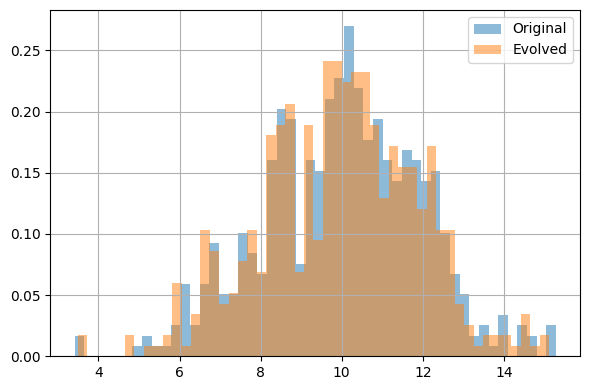

step 10 | loss = 0.001113 | mu = 3.4995 | var = 3.8738


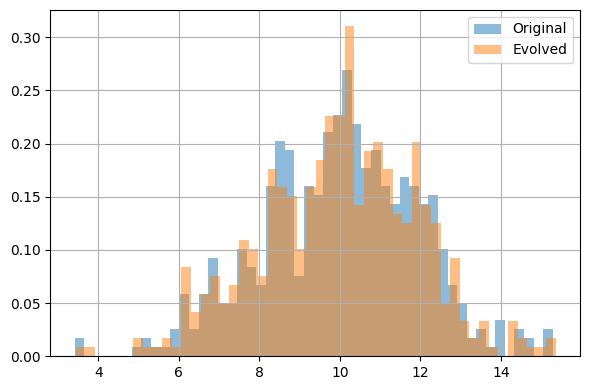

step 20 | loss = 0.000560 | mu = 4.9874 | var = 4.7144


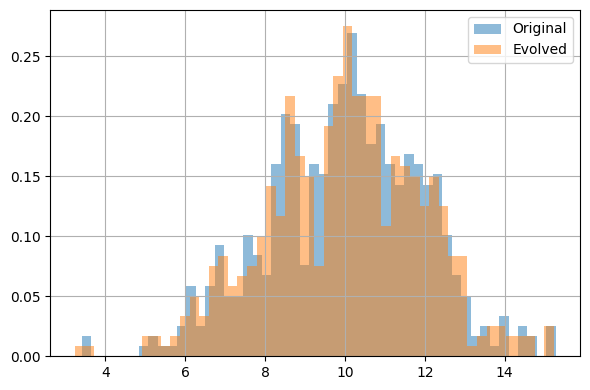

step 30 | loss = 0.000710 | mu = 5.8798 | var = 5.0699


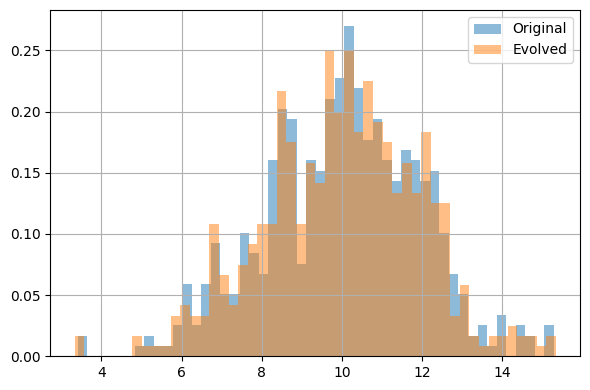

step 40 | loss = 0.001165 | mu = 6.5177 | var = 5.2292


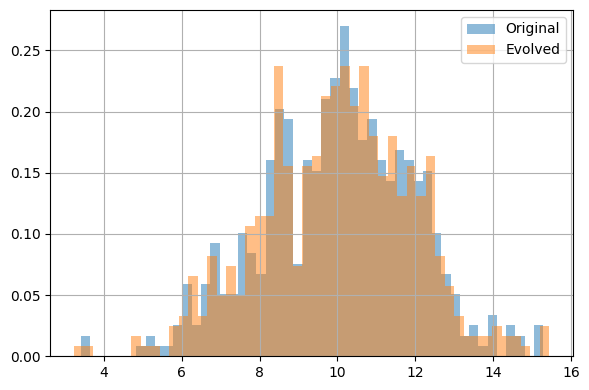

step 50 | loss = 0.000516 | mu = 6.9582 | var = 5.2999


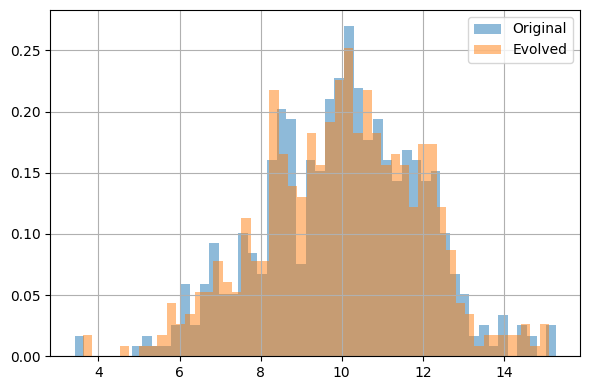

step 60 | loss = 0.000691 | mu = 7.3647 | var = 5.3362


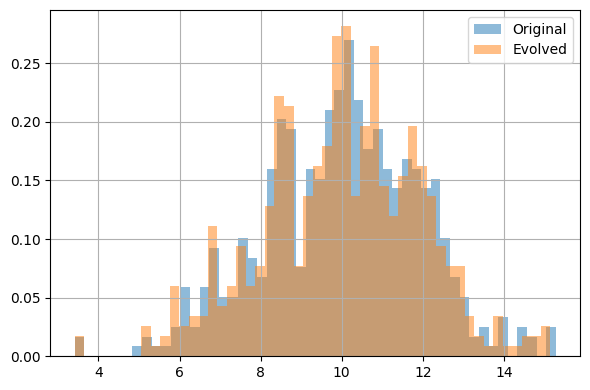

step 70 | loss = 0.000522 | mu = 7.7904 | var = 5.3620


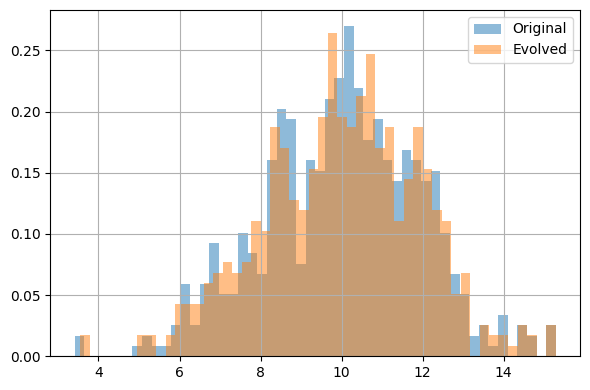

step 80 | loss = 0.000398 | mu = 8.1448 | var = 5.3759


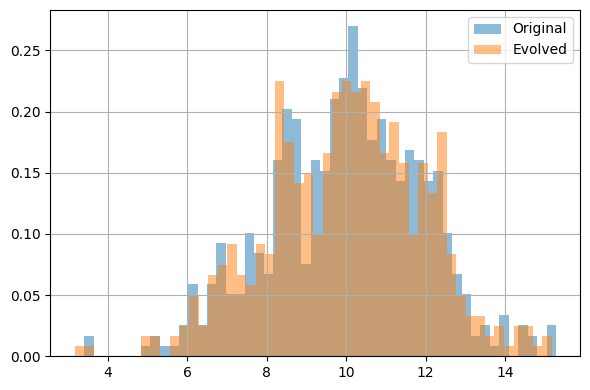

step 90 | loss = 0.000834 | mu = 8.4285 | var = 5.3747


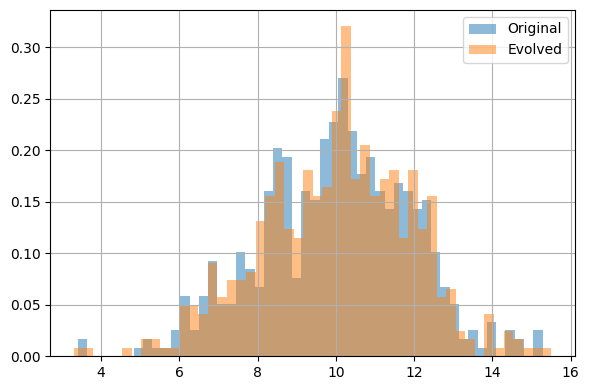

step 100 | loss = 0.000758 | mu = 8.7059 | var = 5.3741


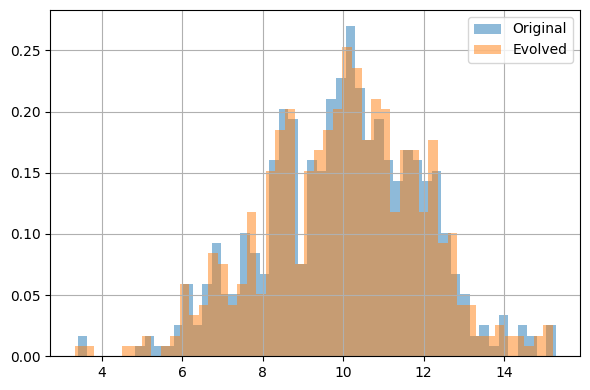

step 110 | loss = 0.000572 | mu = 9.0086 | var = 5.3753


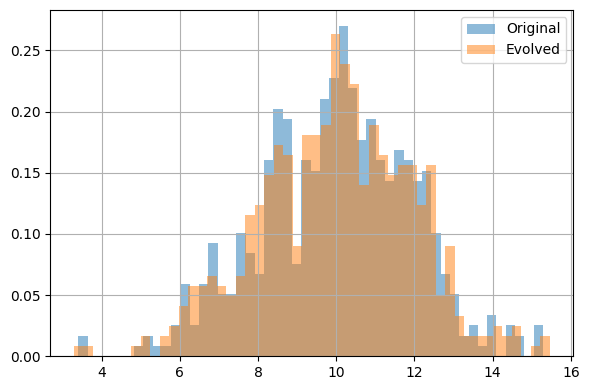

step 120 | loss = 0.000411 | mu = 9.3806 | var = 5.3763


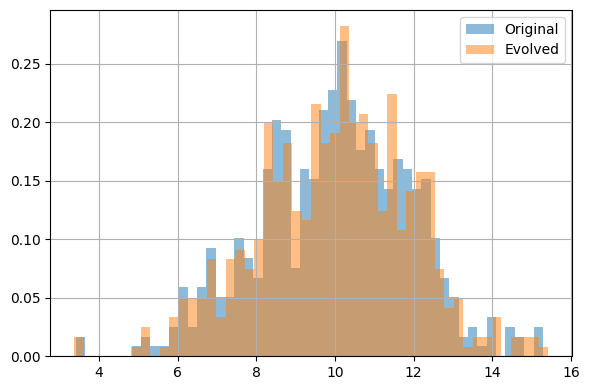

step 130 | loss = 0.000742 | mu = 9.6531 | var = 5.3688


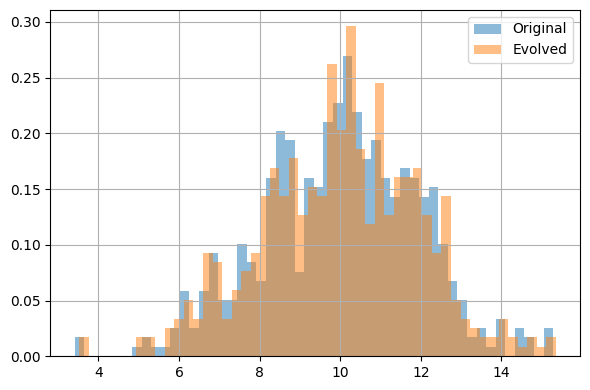

step 140 | loss = 0.000559 | mu = 9.7342 | var = 5.3569


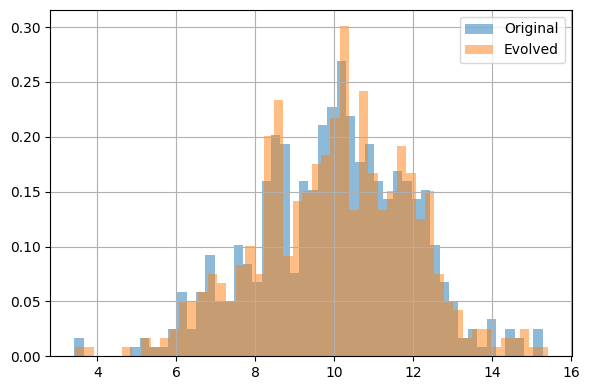

step 150 | loss = 0.000713 | mu = 9.5363 | var = 5.3455


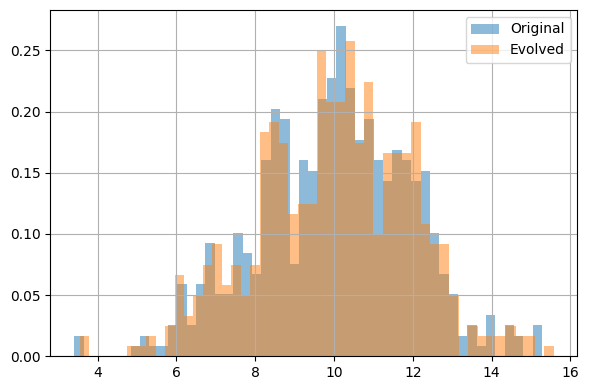

step 160 | loss = 0.000664 | mu = 9.3789 | var = 5.3296


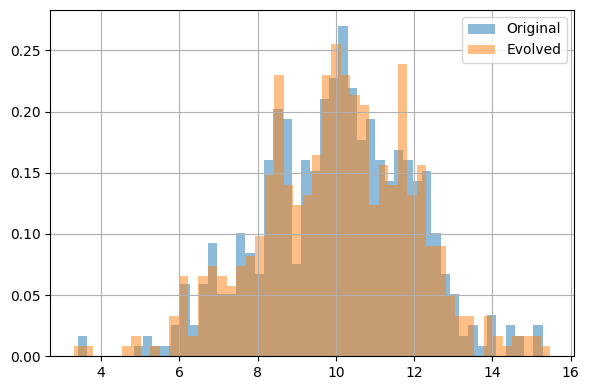

step 170 | loss = 0.000760 | mu = 9.5233 | var = 5.3192


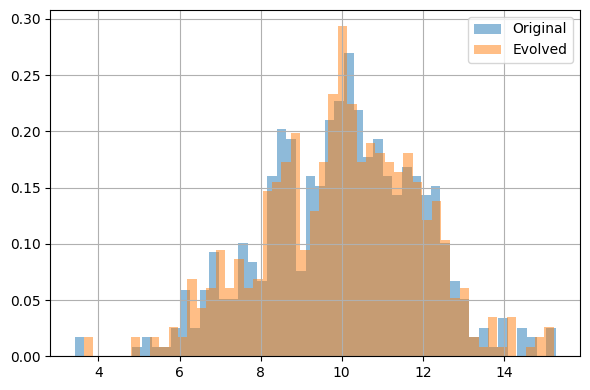

step 180 | loss = 0.000643 | mu = 9.6331 | var = 5.3125


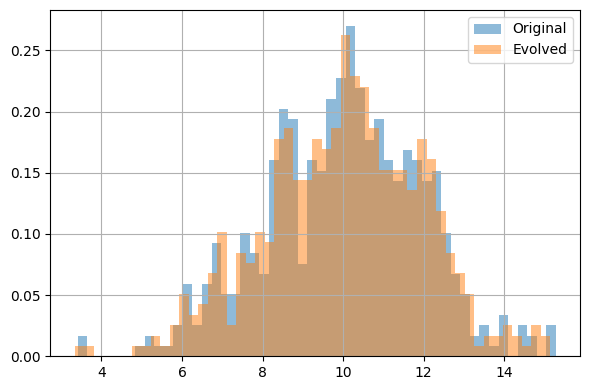

step 190 | loss = 0.000324 | mu = 9.8497 | var = 5.3021


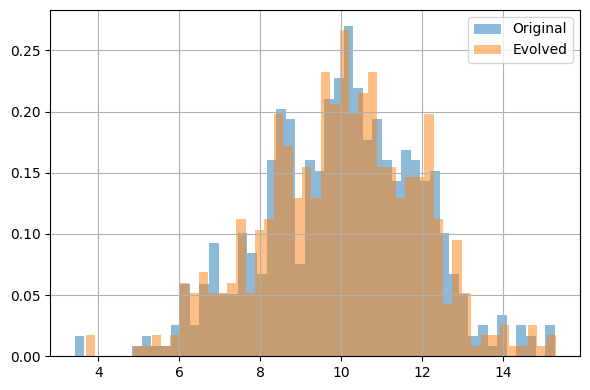

step 200 | loss = 0.000805 | mu = 9.9079 | var = 5.2971


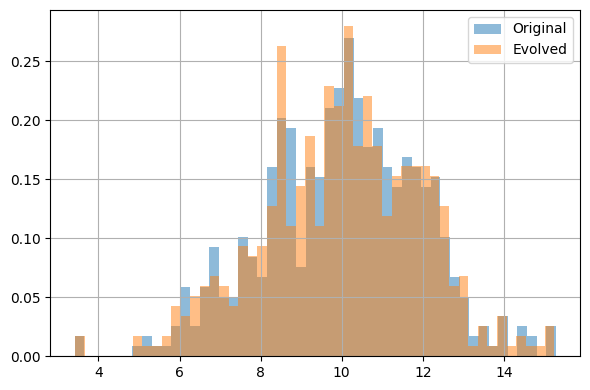

step 210 | loss = 0.000482 | mu = 10.1401 | var = 5.2873


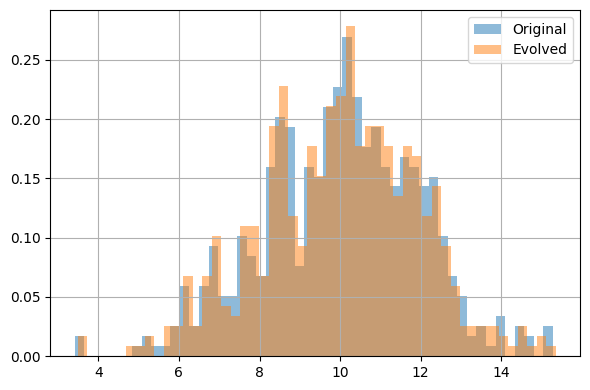

step 220 | loss = 0.000616 | mu = 10.2642 | var = 5.2743


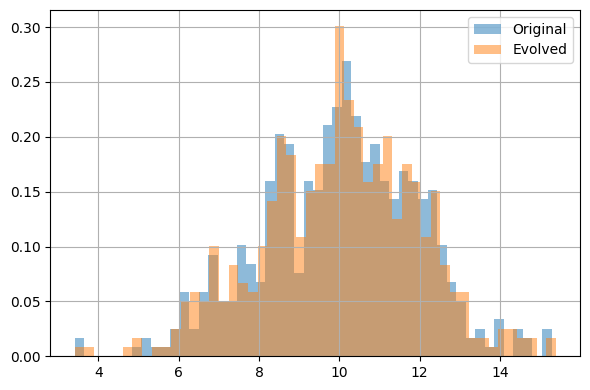

step 230 | loss = 0.000396 | mu = 10.3698 | var = 5.2629


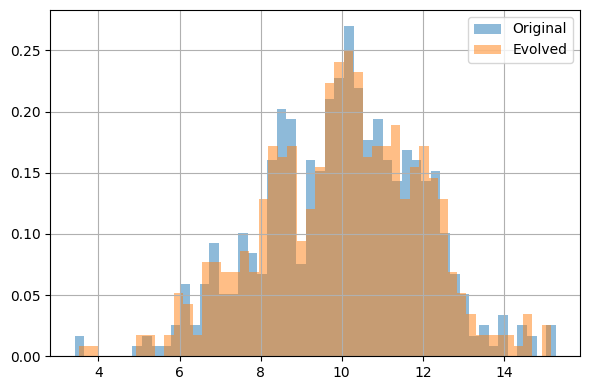

step 240 | loss = 0.000735 | mu = 10.5518 | var = 5.2555


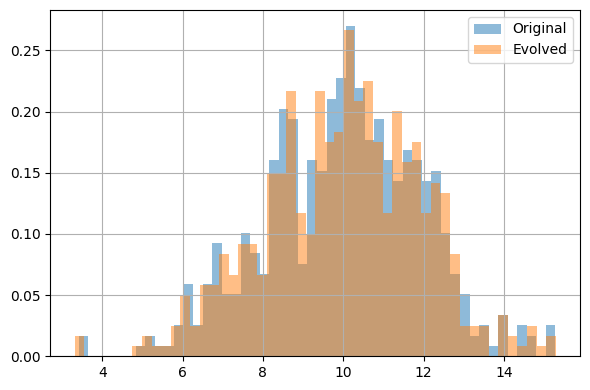

step 250 | loss = 0.000704 | mu = 10.7306 | var = 5.2472


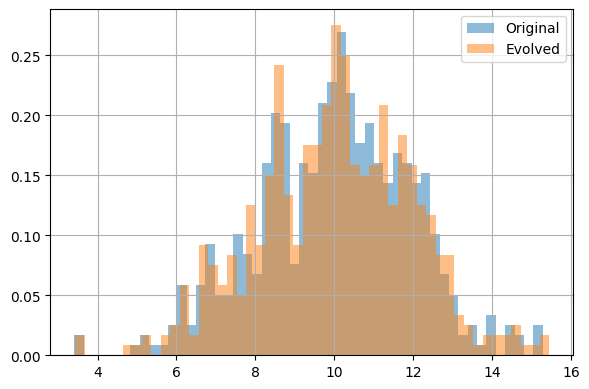

step 260 | loss = 0.000859 | mu = 10.8814 | var = 5.2280


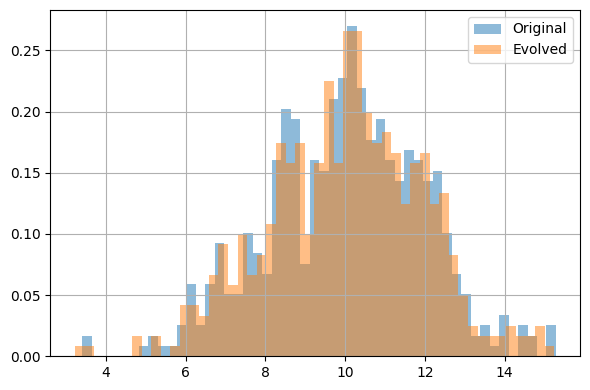

step 270 | loss = 0.000501 | mu = 11.0381 | var = 5.2139


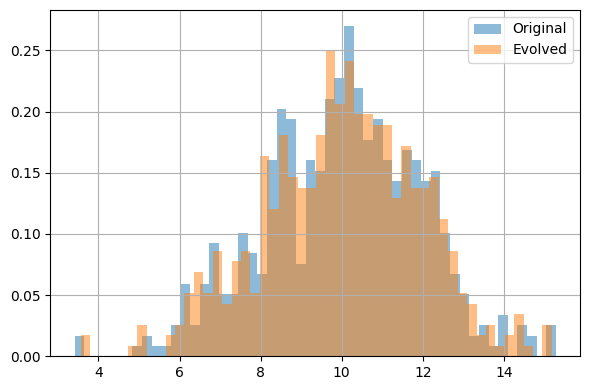

step 280 | loss = 0.000758 | mu = 10.9619 | var = 5.1999


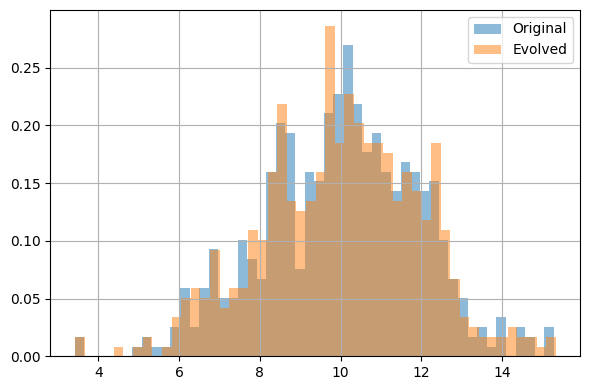

step 290 | loss = 0.000305 | mu = 11.0804 | var = 5.1754


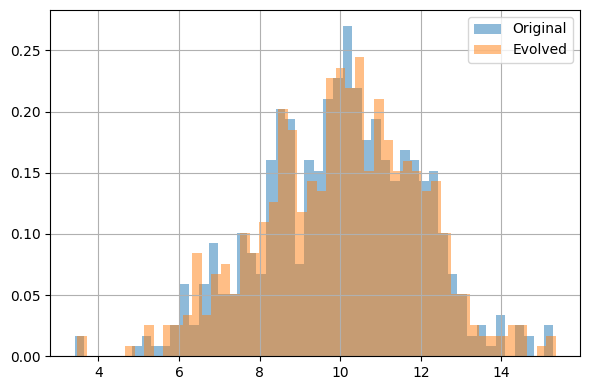

step 300 | loss = 0.000532 | mu = 10.9617 | var = 5.1579


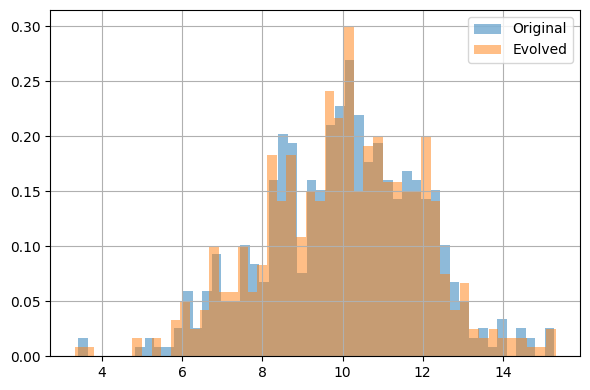

step 310 | loss = 0.001001 | mu = 11.0056 | var = 5.1437


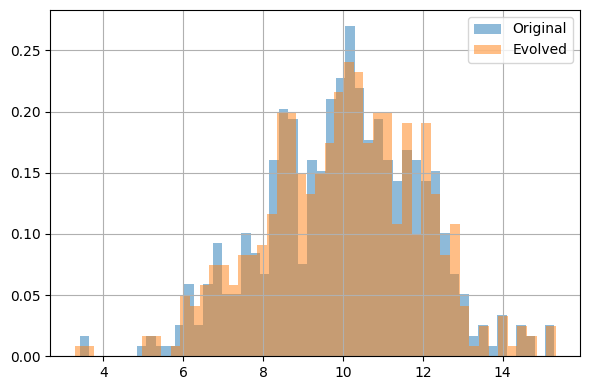

step 320 | loss = 0.000536 | mu = 11.0684 | var = 5.1275


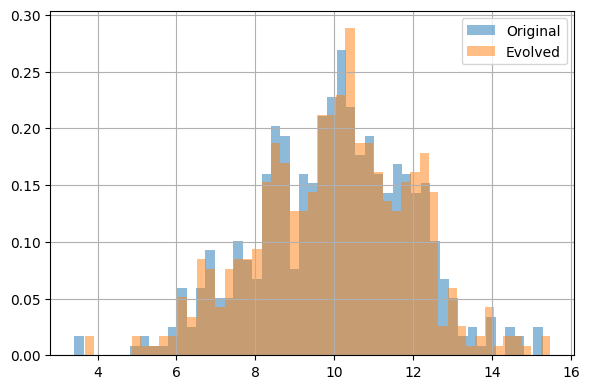

step 330 | loss = 0.000665 | mu = 11.2053 | var = 5.1151


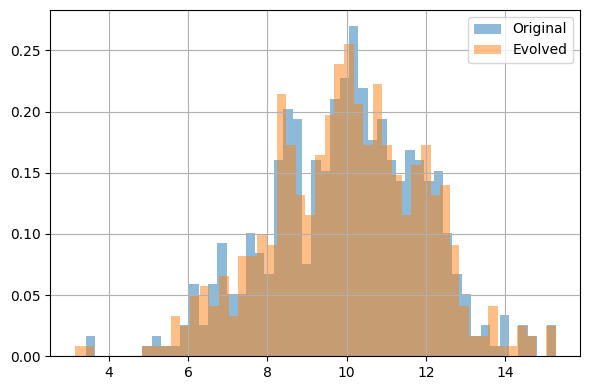

step 340 | loss = 0.000695 | mu = 11.2590 | var = 5.1018


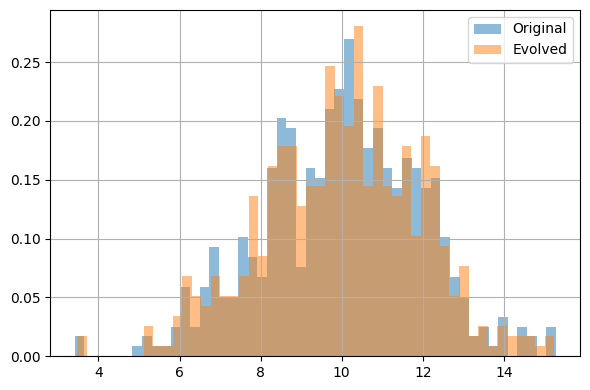

step 350 | loss = 0.000454 | mu = 10.9725 | var = 5.1074


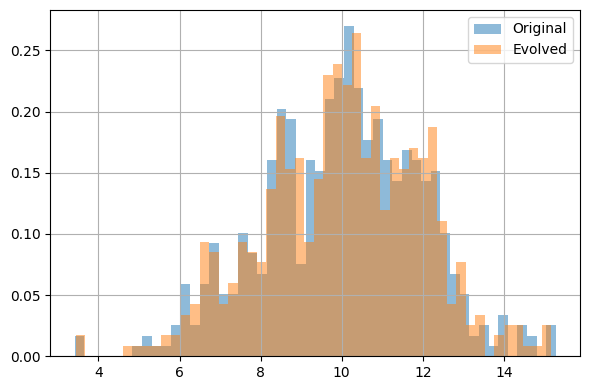

step 360 | loss = 0.000700 | mu = 10.7594 | var = 5.1051


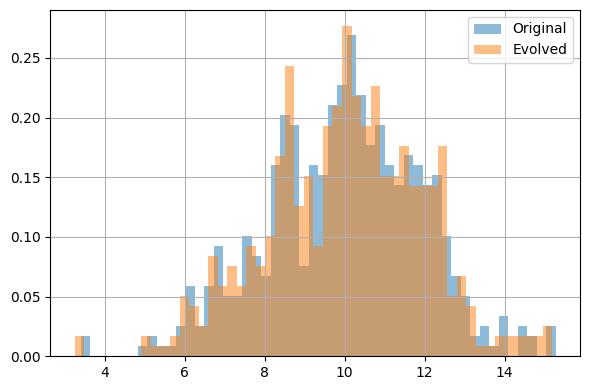

step 370 | loss = 0.000858 | mu = 10.9362 | var = 5.0960


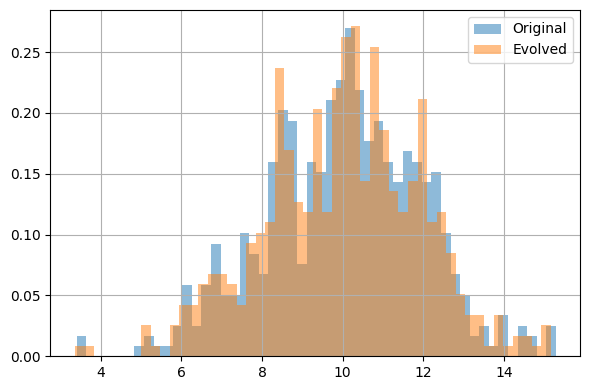

step 380 | loss = 0.000251 | mu = 11.2625 | var = 5.0834


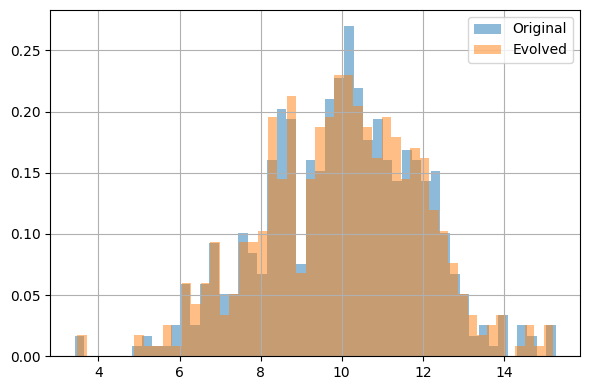

step 390 | loss = 0.000770 | mu = 11.4928 | var = 5.0694


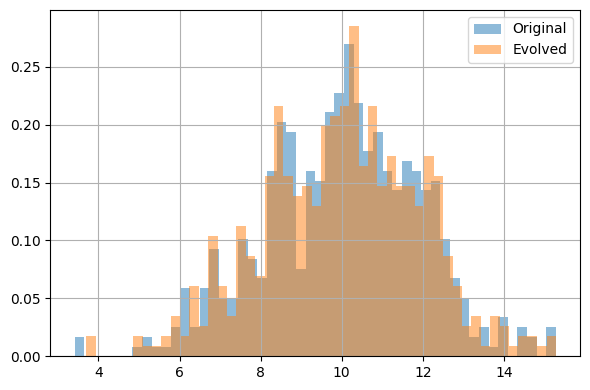

step 400 | loss = 0.000366 | mu = 11.5769 | var = 5.0536


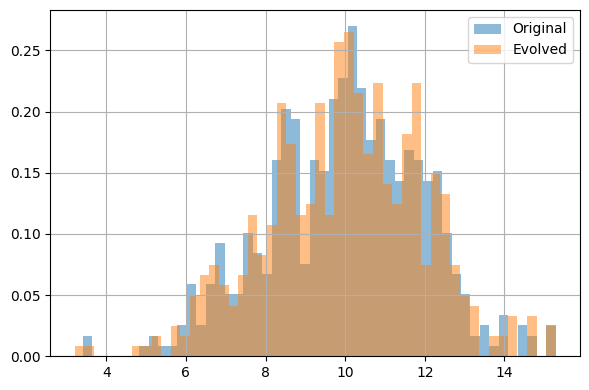

step 410 | loss = 0.000451 | mu = 11.5233 | var = 5.0415


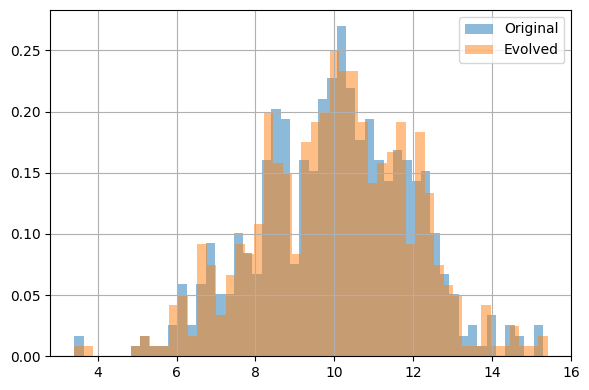

step 420 | loss = 0.000554 | mu = 11.4130 | var = 5.0250


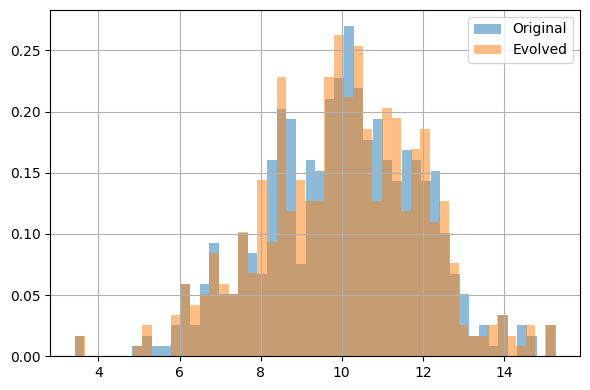

step 430 | loss = 0.000843 | mu = 11.3474 | var = 5.0008


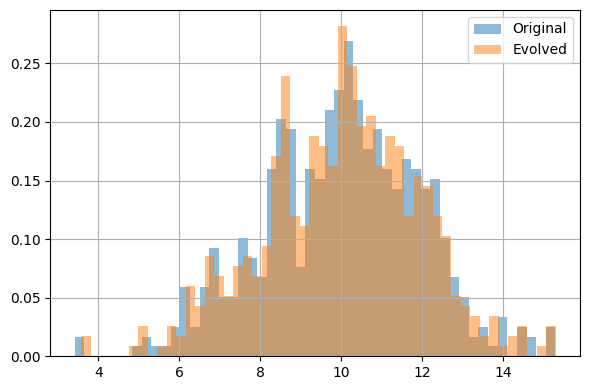

step 440 | loss = 0.000762 | mu = 11.2741 | var = 4.9855


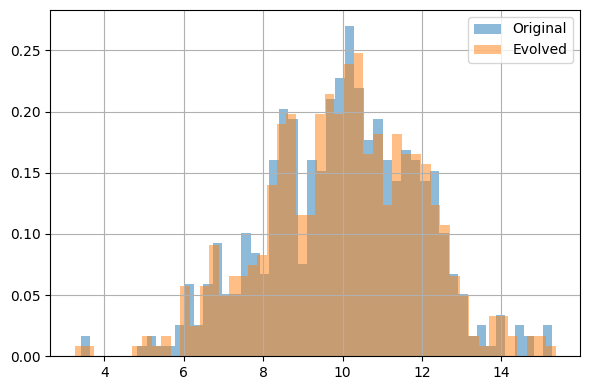

step 450 | loss = 0.000762 | mu = 10.9931 | var = 4.9790


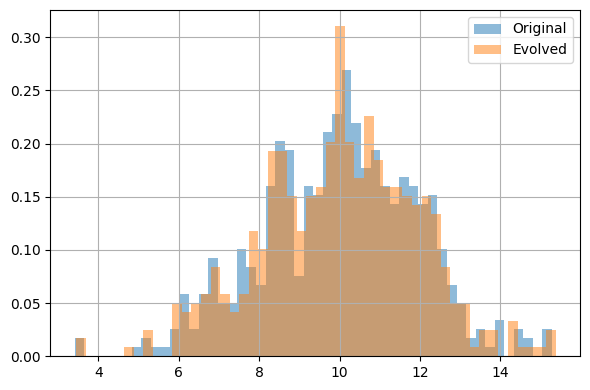

step 460 | loss = 0.000409 | mu = 10.9018 | var = 4.9595


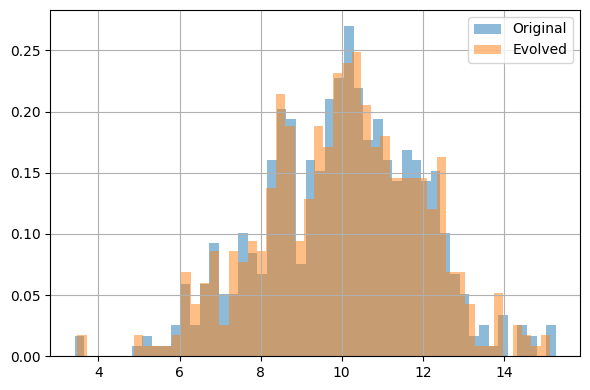

step 470 | loss = 0.000474 | mu = 11.0065 | var = 4.9418


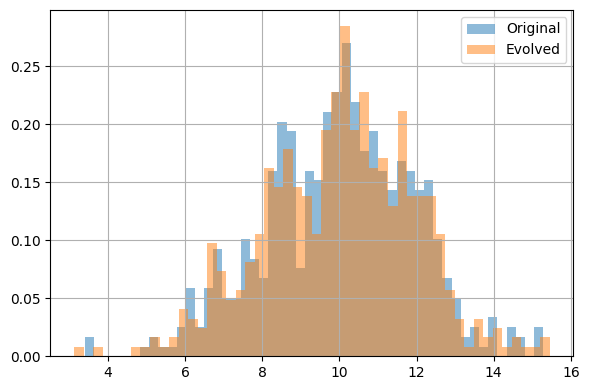

step 480 | loss = 0.000482 | mu = 11.3124 | var = 4.9191


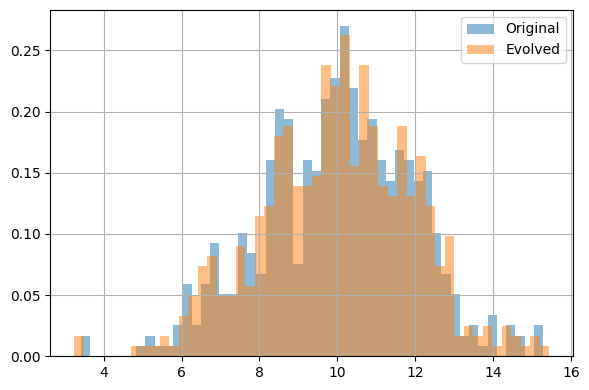

step 490 | loss = 0.000523 | mu = 10.9659 | var = 4.9028


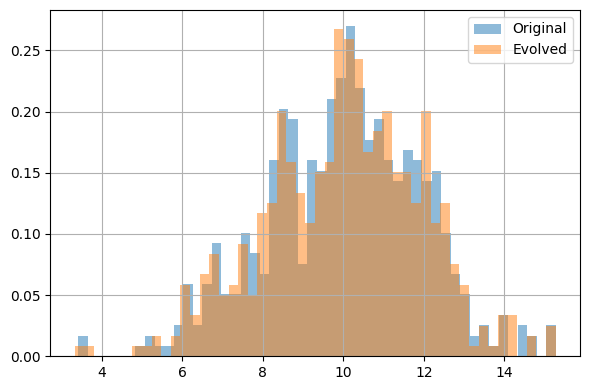

step 500 | loss = 0.000469 | mu = 10.4061 | var = 4.8924


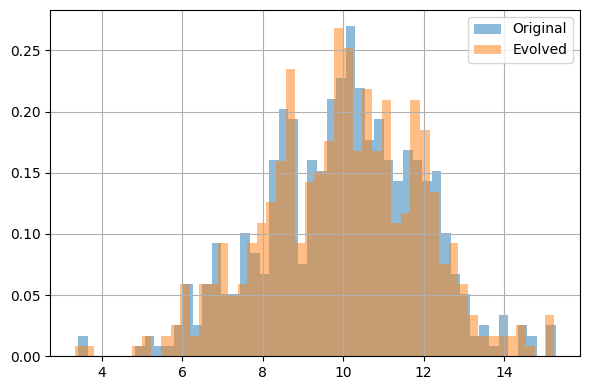

step 510 | loss = 0.000629 | mu = 10.2720 | var = 4.8784


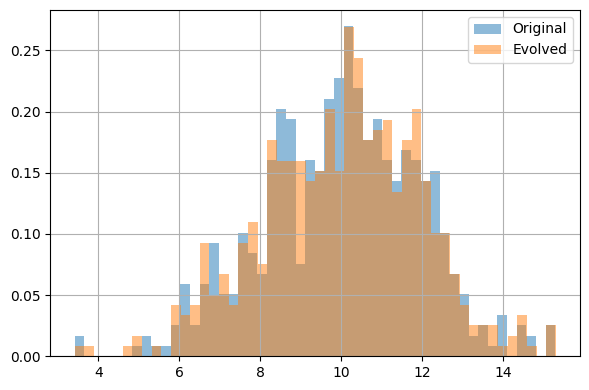

step 520 | loss = 0.000869 | mu = 10.2862 | var = 4.8594


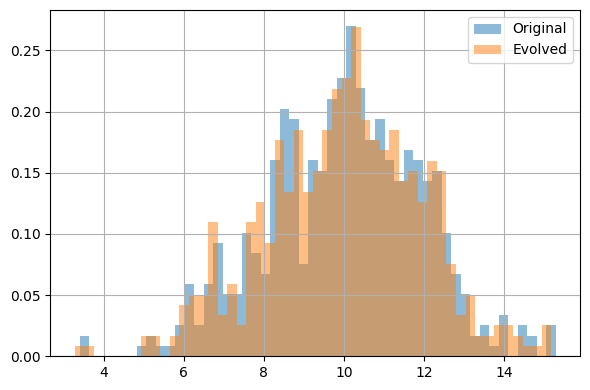

step 530 | loss = 0.000408 | mu = 10.0544 | var = 4.8278


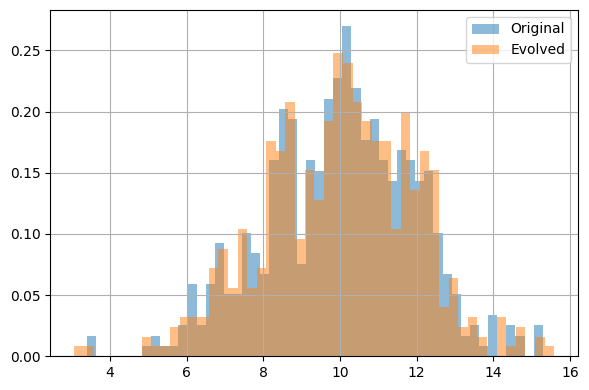

step 540 | loss = 0.000522 | mu = 9.9137 | var = 4.8076


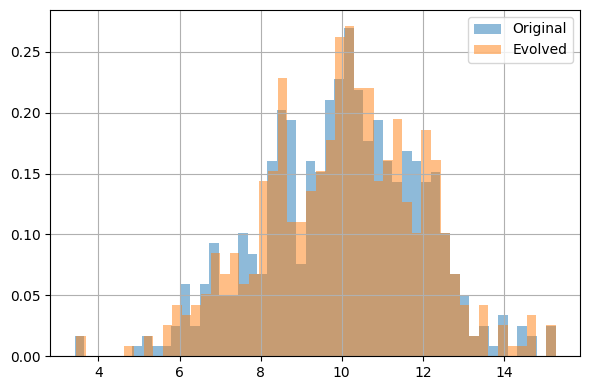

step 550 | loss = 0.000432 | mu = 10.1673 | var = 4.7715


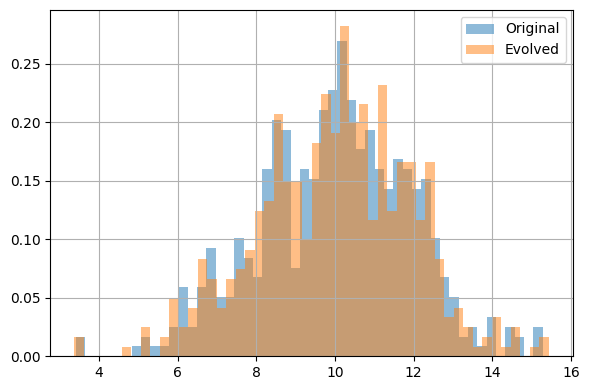

step 560 | loss = 0.000779 | mu = 10.1144 | var = 4.7305


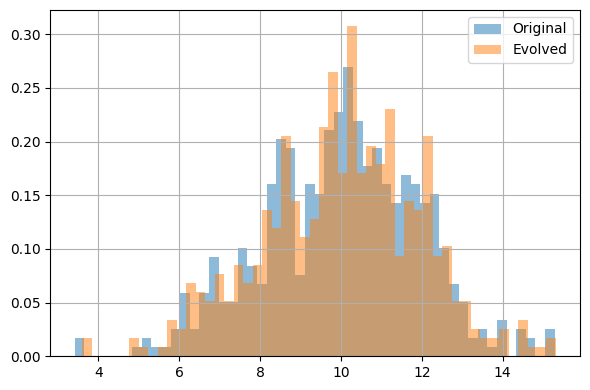

step 570 | loss = 0.000578 | mu = 10.2535 | var = 4.7050


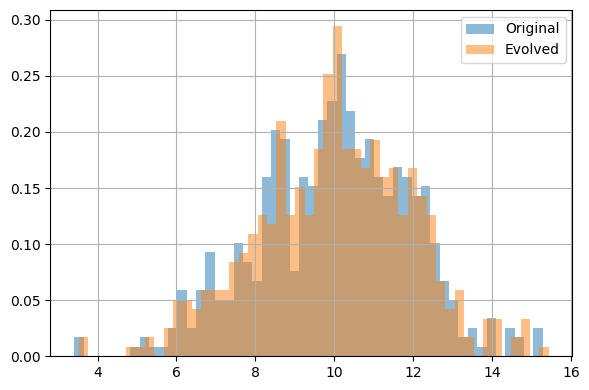

step 580 | loss = 0.000596 | mu = 10.3967 | var = 4.6743


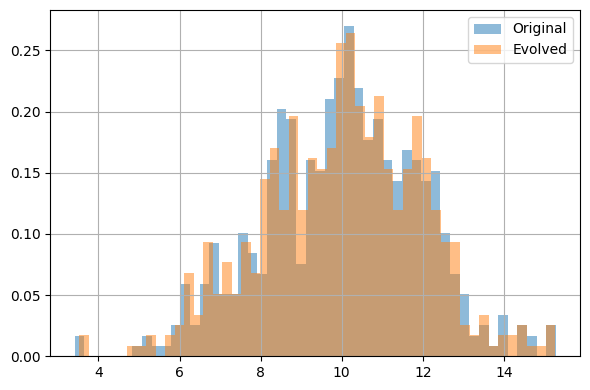

step 590 | loss = 0.000524 | mu = 10.6838 | var = 4.6409


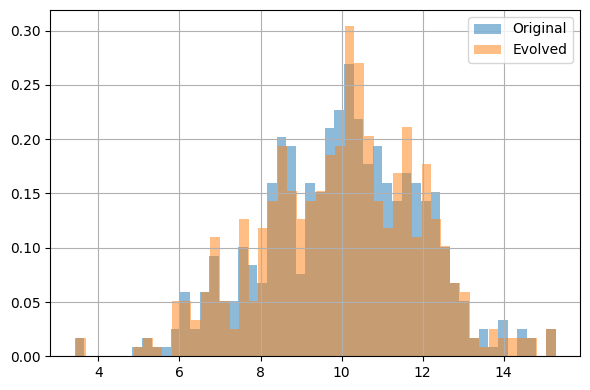

step 600 | loss = 0.000313 | mu = 10.4204 | var = 4.6152


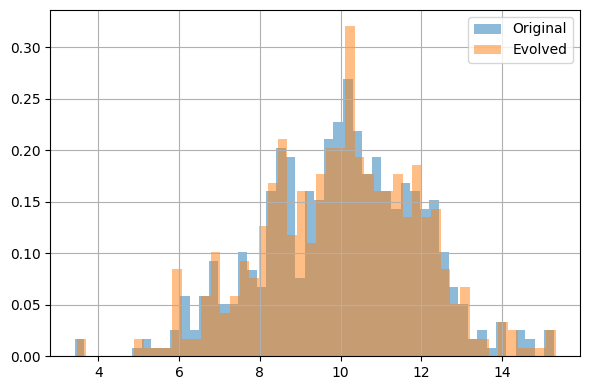

step 610 | loss = 0.000407 | mu = 10.1478 | var = 4.5997


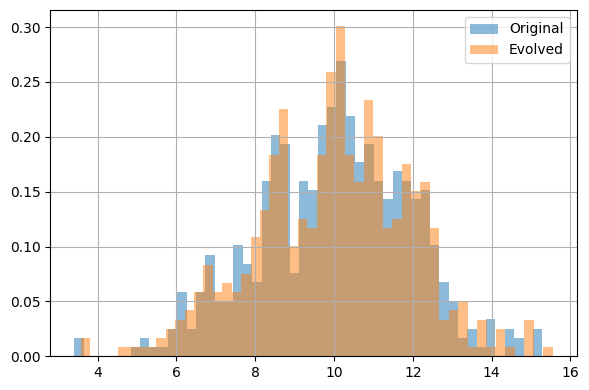

step 620 | loss = 0.000428 | mu = 9.9008 | var = 4.5788


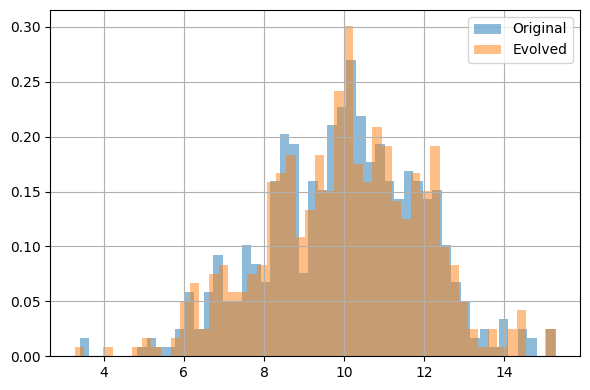

step 630 | loss = 0.000416 | mu = 9.8282 | var = 4.5329


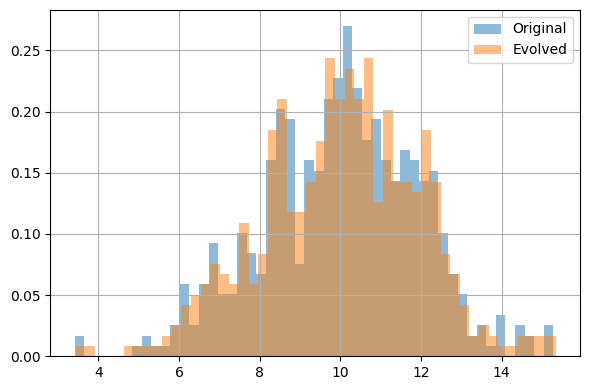

step 640 | loss = 0.000451 | mu = 9.9134 | var = 4.5038


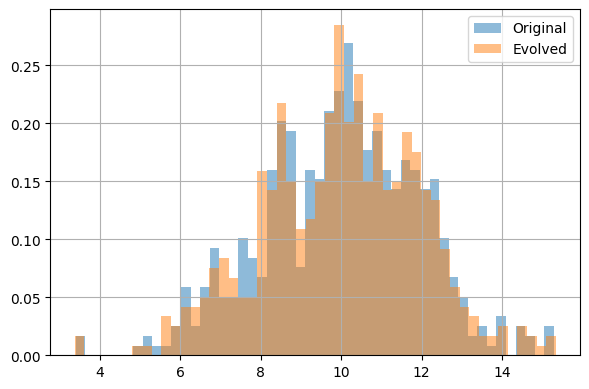

step 650 | loss = 0.000607 | mu = 9.9108 | var = 4.4749


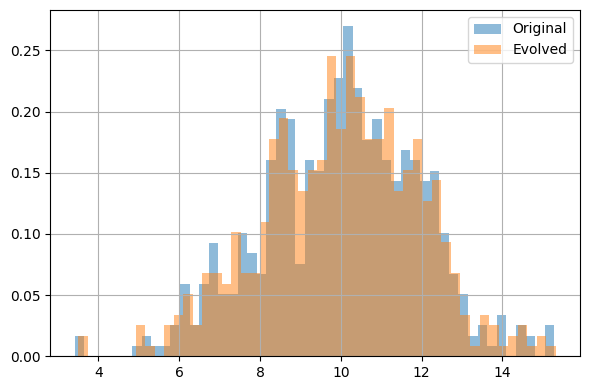

step 660 | loss = 0.000286 | mu = 10.3297 | var = 4.4503


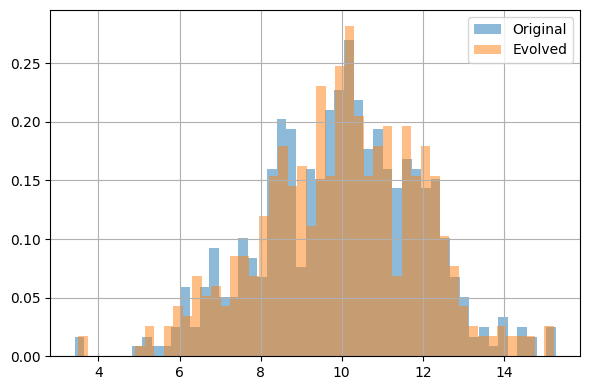

step 670 | loss = 0.000422 | mu = 10.6160 | var = 4.4369


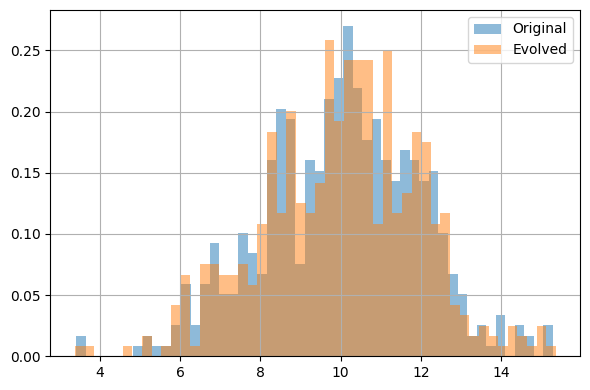

step 680 | loss = 0.000778 | mu = 10.8457 | var = 4.4041


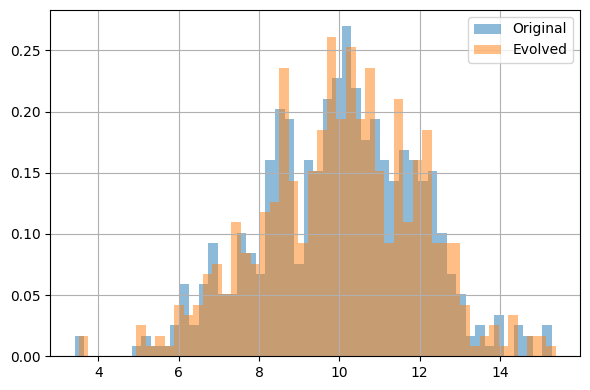

step 690 | loss = 0.000471 | mu = 11.0486 | var = 4.3392


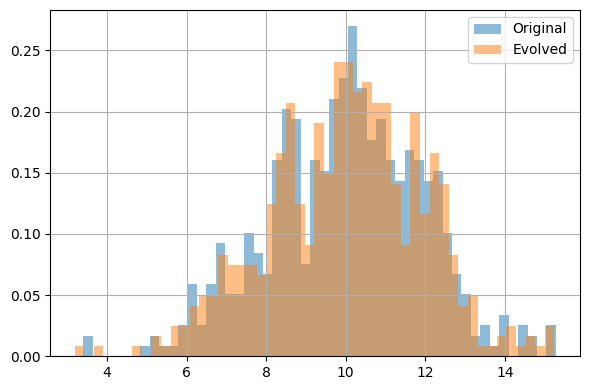

step 700 | loss = 0.000255 | mu = 10.8343 | var = 4.3078


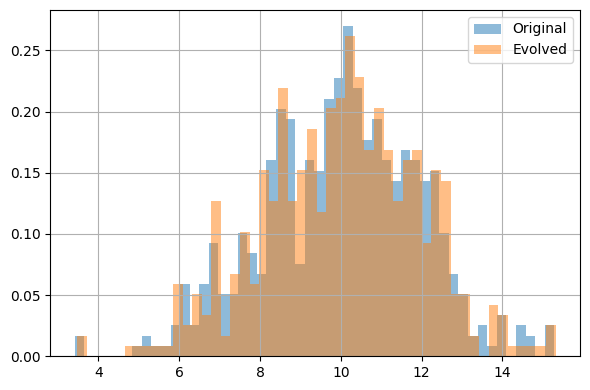

step 710 | loss = 0.000639 | mu = 10.1983 | var = 4.2970


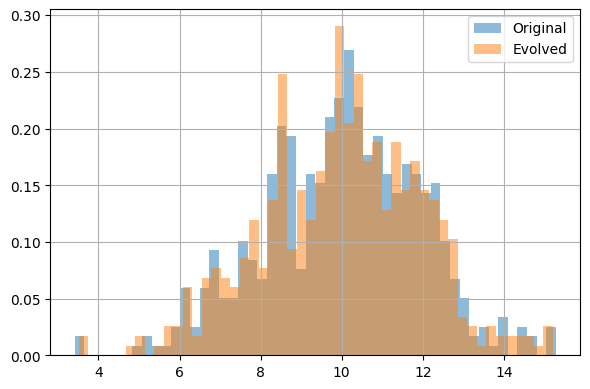

step 720 | loss = 0.000632 | mu = 9.9251 | var = 4.2837


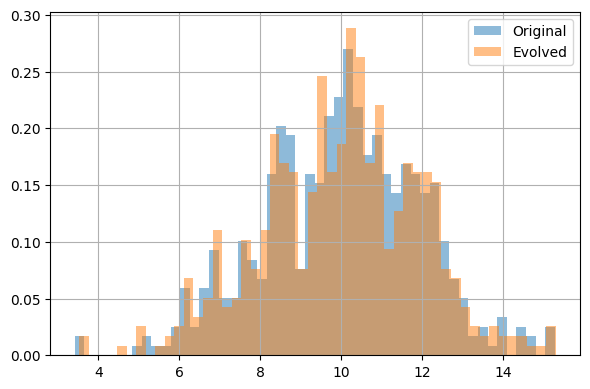

step 730 | loss = 0.000465 | mu = 9.6306 | var = 4.2555


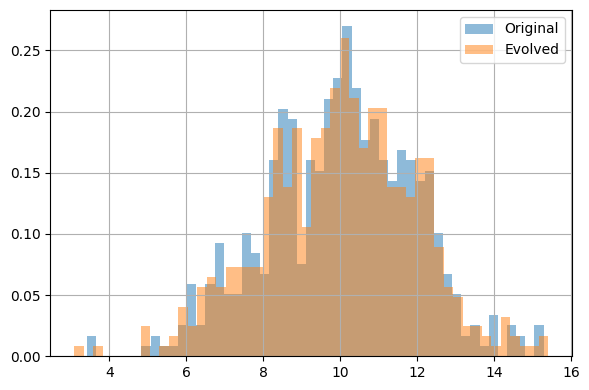

step 740 | loss = 0.000503 | mu = 9.7946 | var = 4.2205


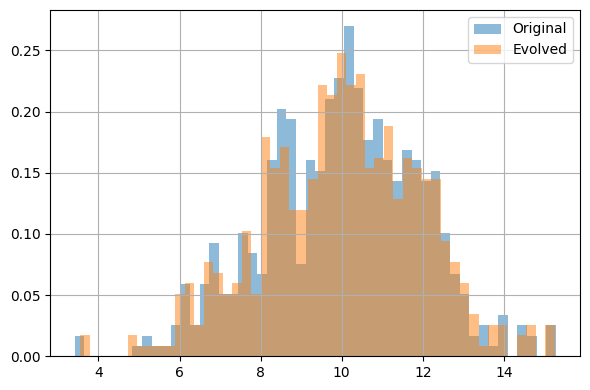

step 750 | loss = 0.000755 | mu = 9.9623 | var = 4.1959


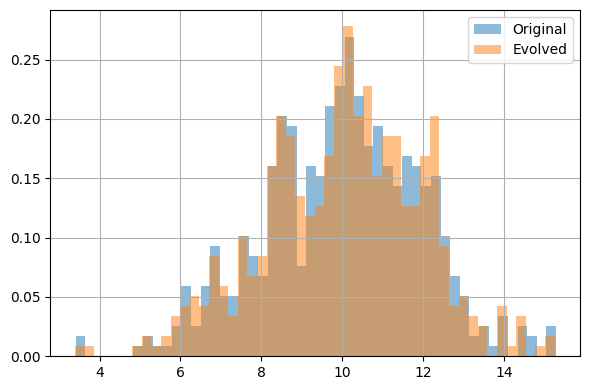

step 760 | loss = 0.000680 | mu = 10.7591 | var = 4.1870


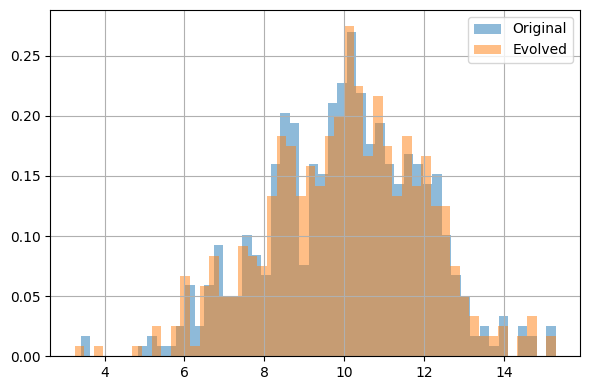

step 770 | loss = 0.000861 | mu = 11.0972 | var = 4.1866


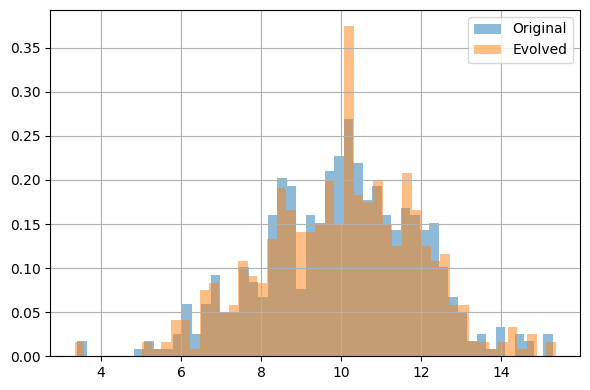

step 780 | loss = 0.000607 | mu = 11.1307 | var = 4.1707


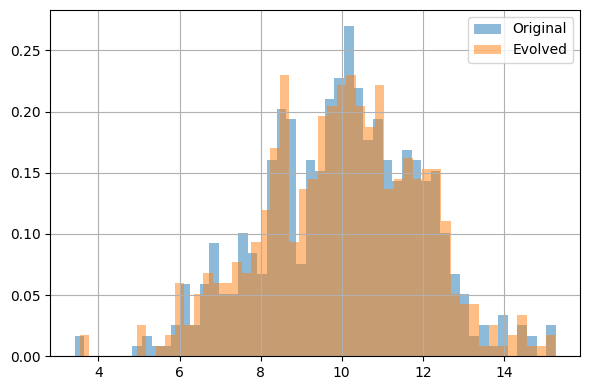

step 790 | loss = 0.000436 | mu = 11.1254 | var = 4.1471


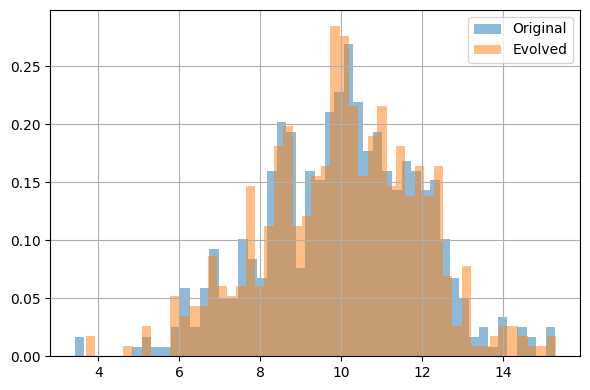

step 800 | loss = 0.000597 | mu = 10.7142 | var = 4.1574


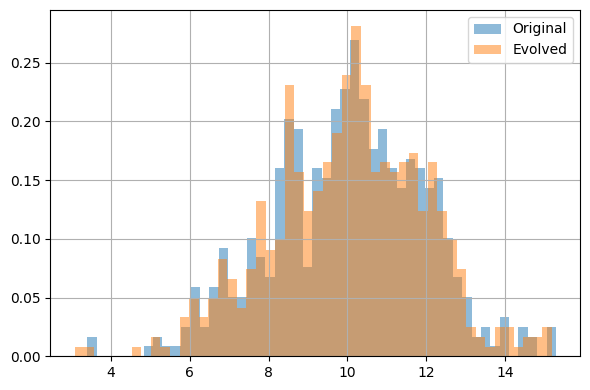

step 810 | loss = 0.000356 | mu = 11.1629 | var = 4.1372


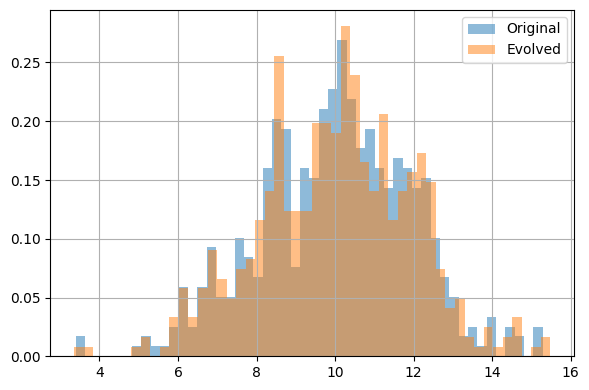

step 820 | loss = 0.000545 | mu = 11.1400 | var = 4.1049


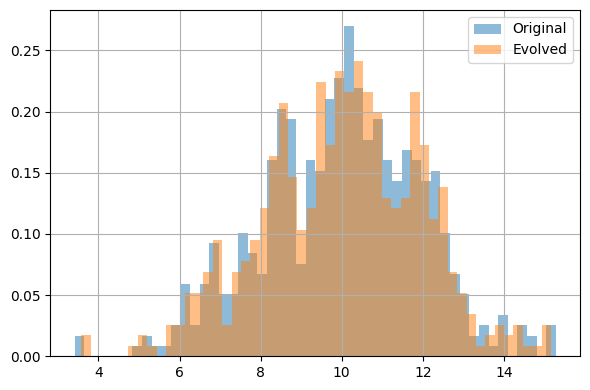

step 830 | loss = 0.000591 | mu = 10.7279 | var = 4.0722


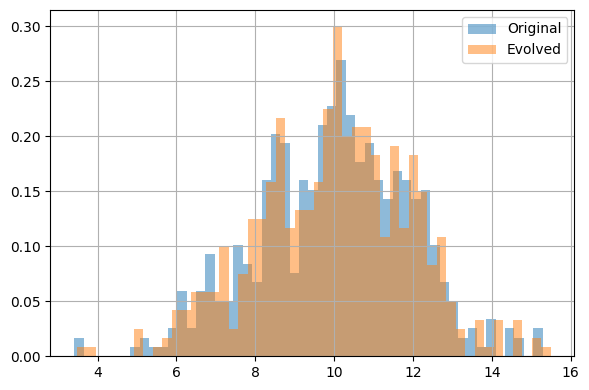

step 840 | loss = 0.000420 | mu = 10.0153 | var = 4.0720


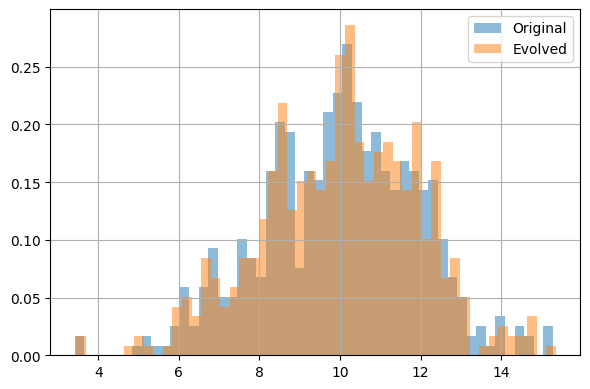

step 850 | loss = 0.000779 | mu = 9.8175 | var = 4.0520


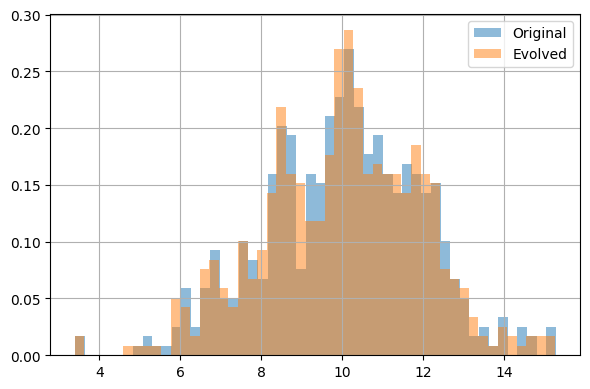

step 860 | loss = 0.000675 | mu = 10.3541 | var = 4.0343


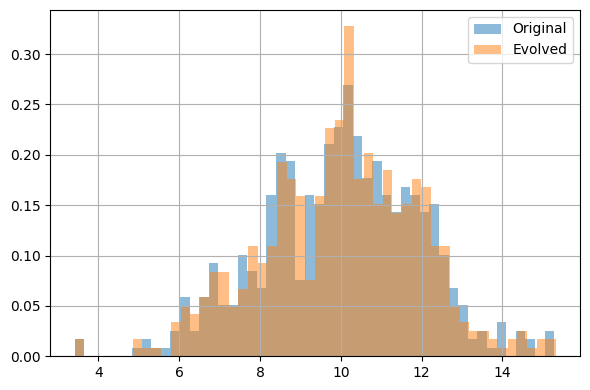

step 870 | loss = 0.000618 | mu = 10.2141 | var = 4.0109


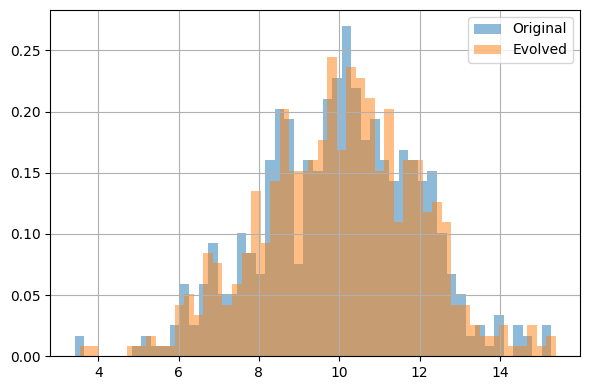

step 880 | loss = 0.000611 | mu = 10.0395 | var = 3.9759


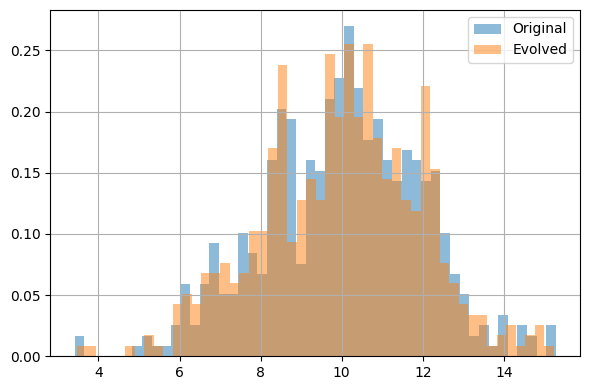

step 890 | loss = 0.000485 | mu = 10.5596 | var = 3.9354


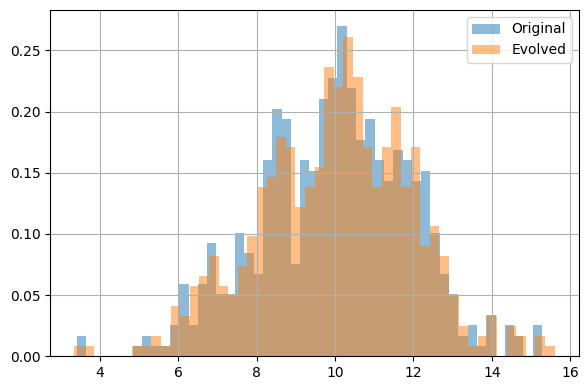

step 900 | loss = 0.000766 | mu = 10.7023 | var = 3.9039


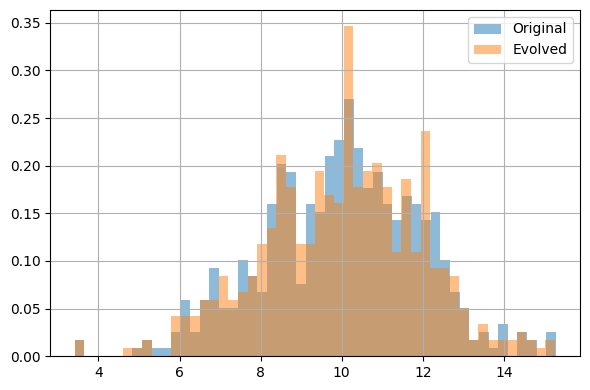

step 910 | loss = 0.000547 | mu = 10.4189 | var = 3.8709


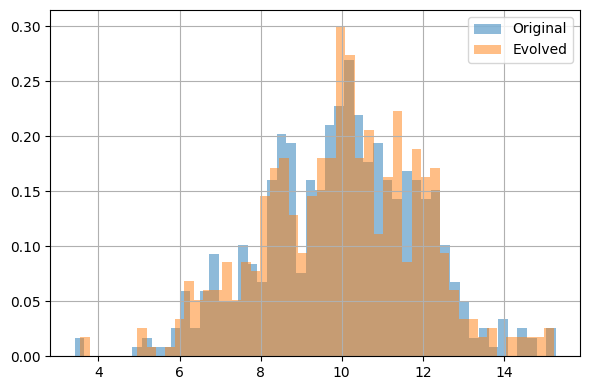

step 920 | loss = 0.000676 | mu = 10.7030 | var = 3.8244


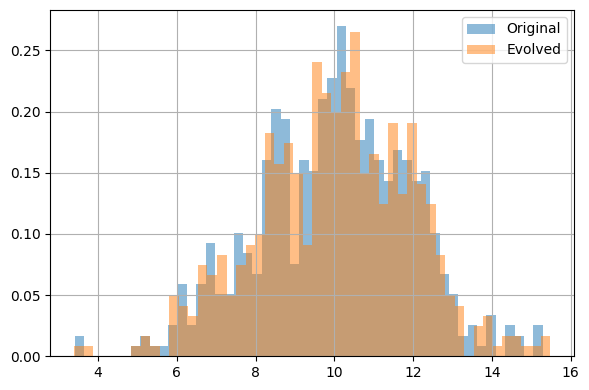

step 930 | loss = 0.000763 | mu = 10.8925 | var = 3.8098


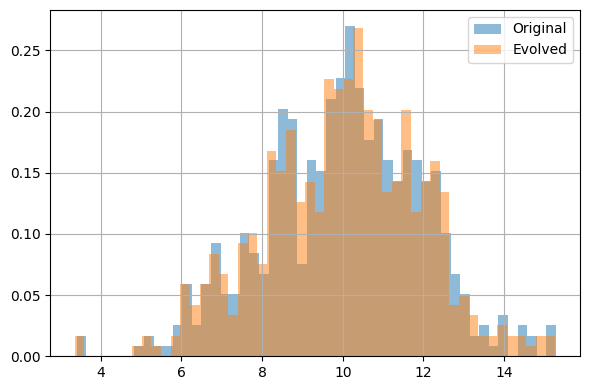

step 940 | loss = 0.000784 | mu = 10.8809 | var = 3.8235


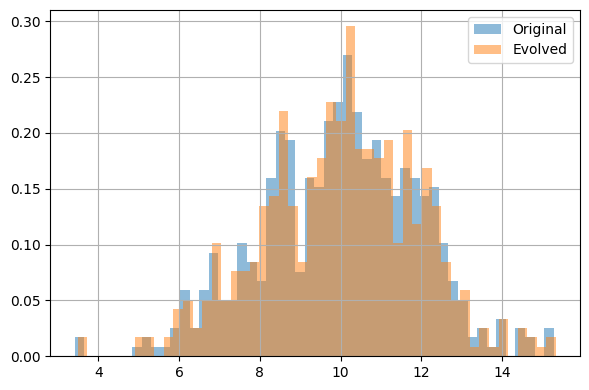

step 950 | loss = 0.000789 | mu = 11.5222 | var = 3.7649


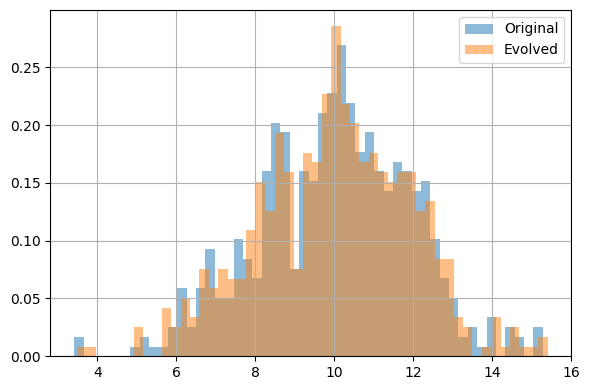

step 960 | loss = 0.001083 | mu = 11.7458 | var = 3.7006


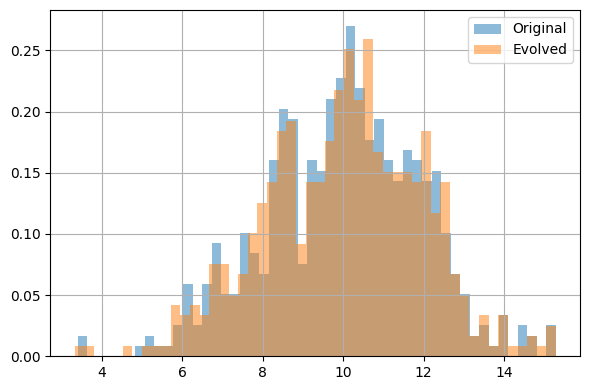

step 970 | loss = 0.000627 | mu = 11.0277 | var = 3.6870


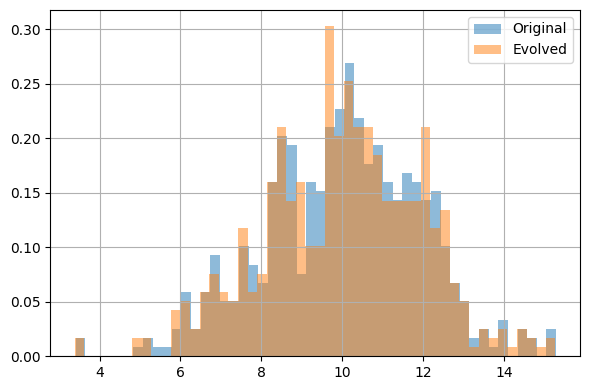

step 980 | loss = 0.000782 | mu = 10.6106 | var = 3.6649


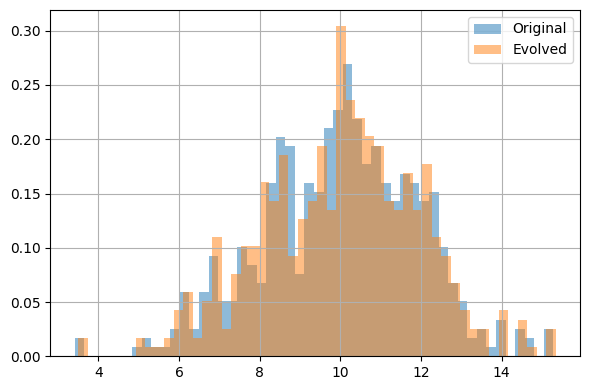

step 990 | loss = 0.000419 | mu = 10.0191 | var = 3.6440


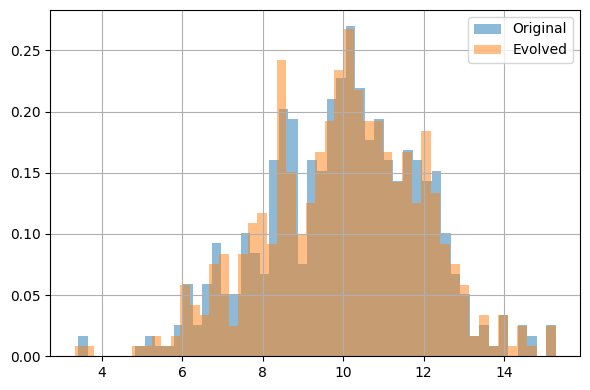

step 1000 | loss = 0.000814 | mu = 10.3099 | var = 3.6120


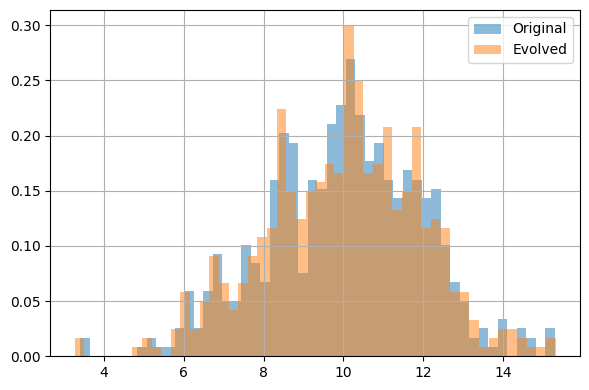

step 1010 | loss = 0.000927 | mu = 10.8102 | var = 3.5711


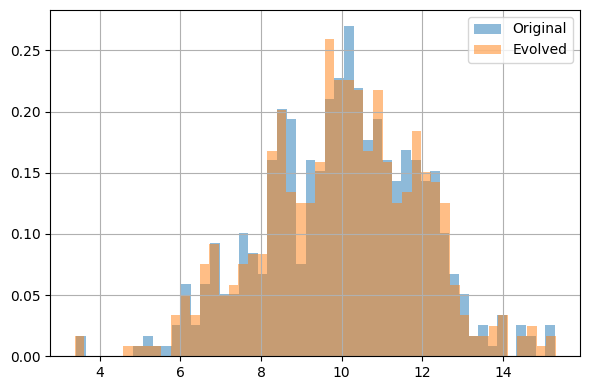

step 1020 | loss = 0.000869 | mu = 11.1637 | var = 3.5088


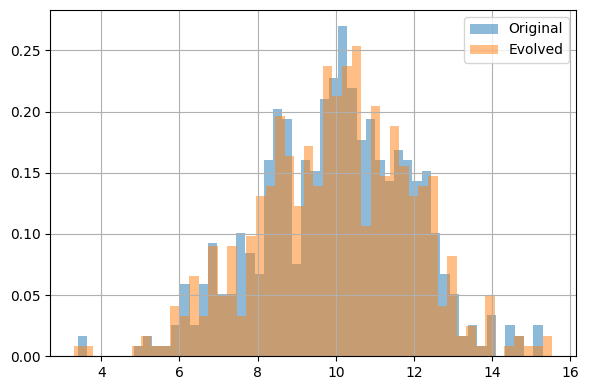

step 1030 | loss = 0.000430 | mu = 10.4752 | var = 3.5126


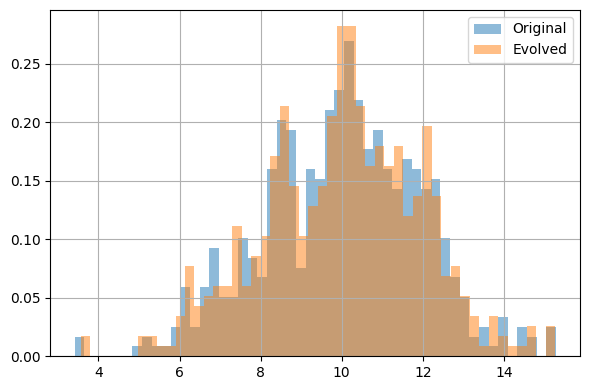

step 1040 | loss = 0.000630 | mu = 10.2106 | var = 3.4860


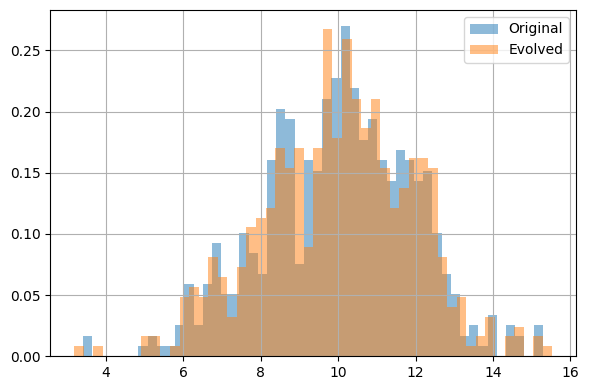

step 1050 | loss = 0.000518 | mu = 9.6986 | var = 3.4226


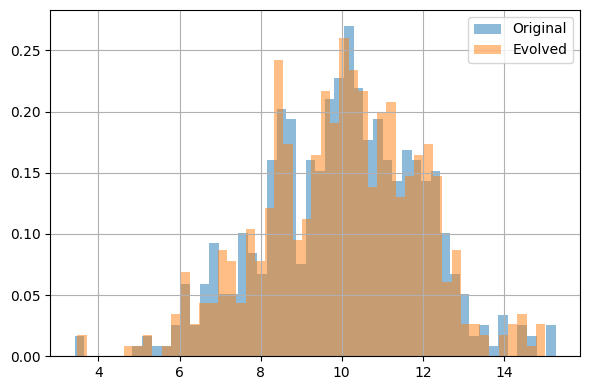

step 1060 | loss = 0.000834 | mu = 9.8472 | var = 3.3622


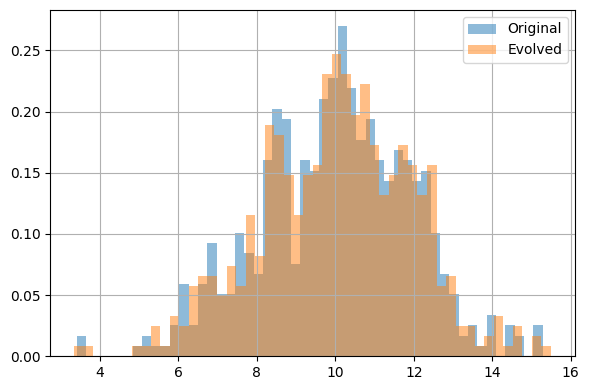

step 1070 | loss = 0.000439 | mu = 10.2317 | var = 3.2747


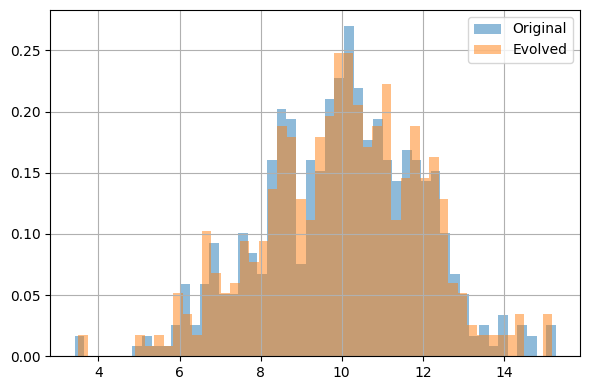

step 1080 | loss = 0.000794 | mu = 9.9764 | var = 3.2331


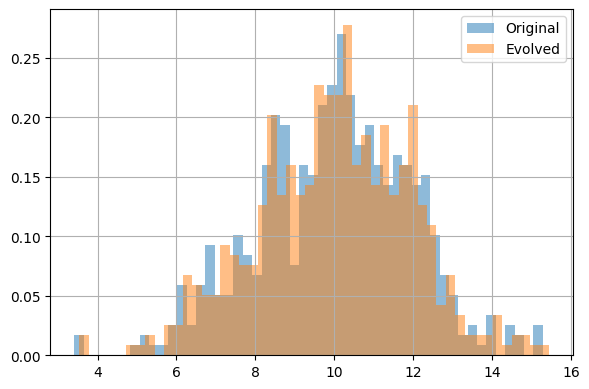

step 1090 | loss = 0.000541 | mu = 10.2737 | var = 3.2039


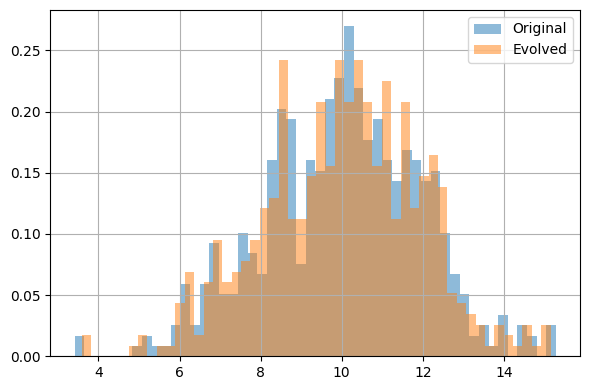

step 1100 | loss = 0.000473 | mu = 10.6779 | var = 3.2076


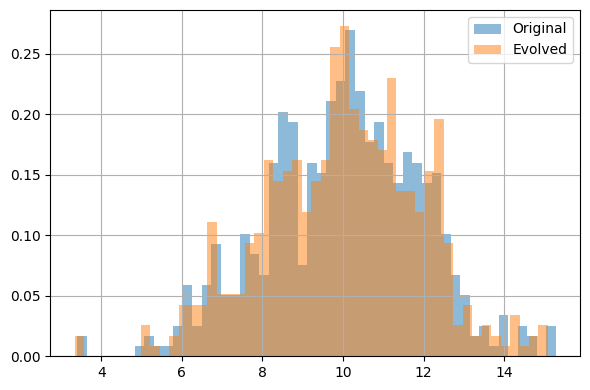

step 1110 | loss = 0.000543 | mu = 11.1709 | var = 3.2366


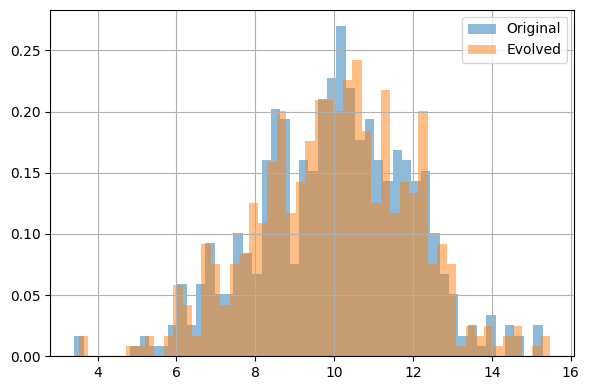

step 1120 | loss = 0.000948 | mu = 11.0091 | var = 3.2376


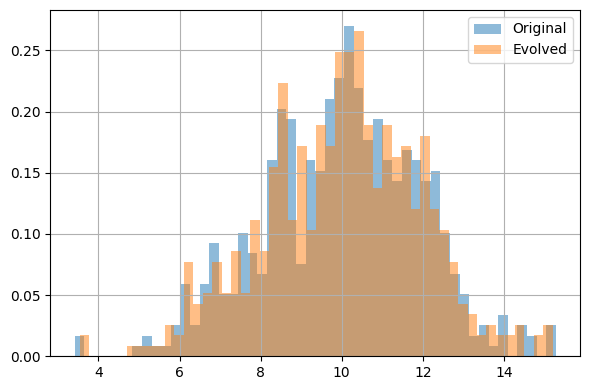

step 1130 | loss = 0.000383 | mu = 10.5701 | var = 3.2660


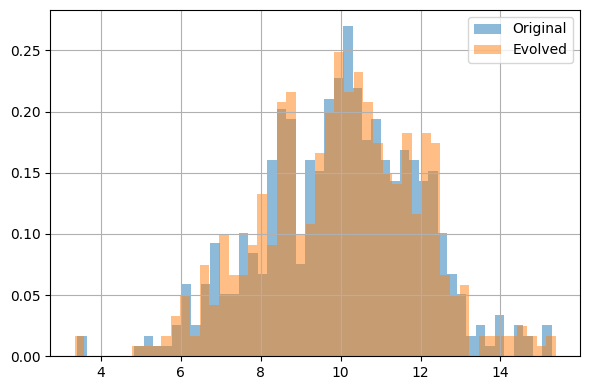

step 1140 | loss = 0.000675 | mu = 10.3617 | var = 3.2648


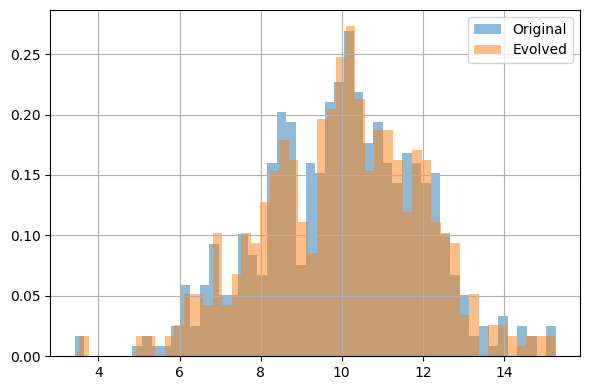

step 1150 | loss = 0.000463 | mu = 9.8716 | var = 3.3089


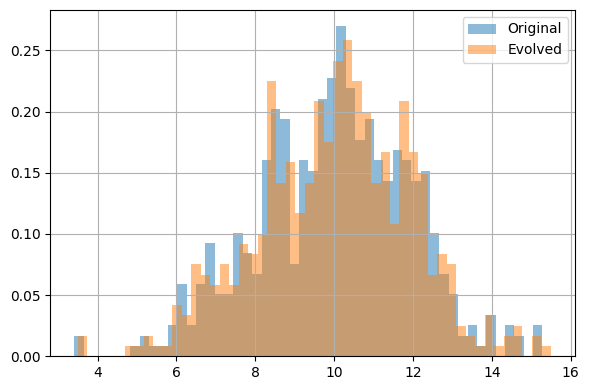

step 1160 | loss = 0.000577 | mu = 9.5993 | var = 3.3713


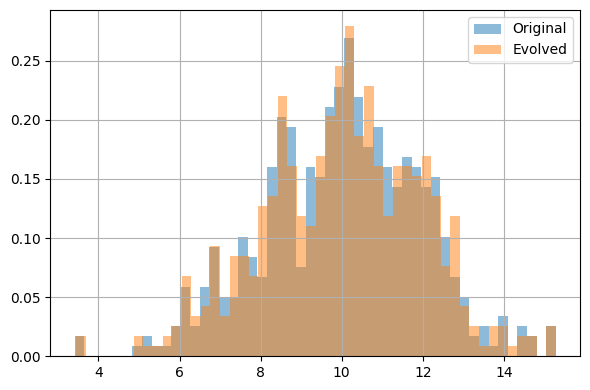

step 1170 | loss = 0.000595 | mu = 9.7623 | var = 3.4154


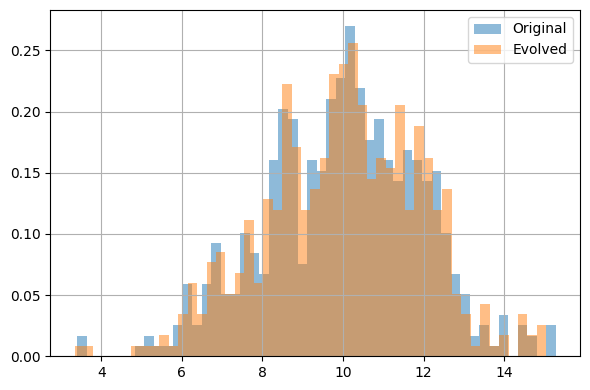

step 1180 | loss = 0.000690 | mu = 10.3290 | var = 3.3768


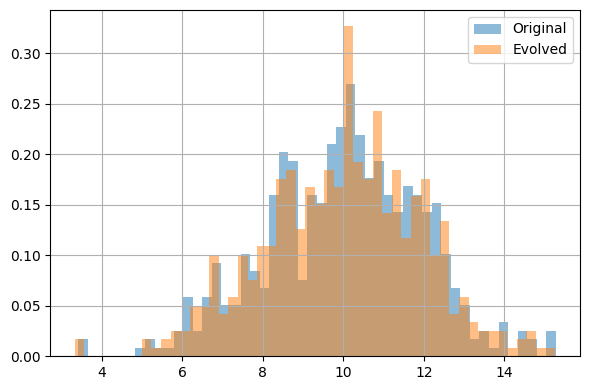

step 1190 | loss = 0.000595 | mu = 11.2687 | var = 3.2822


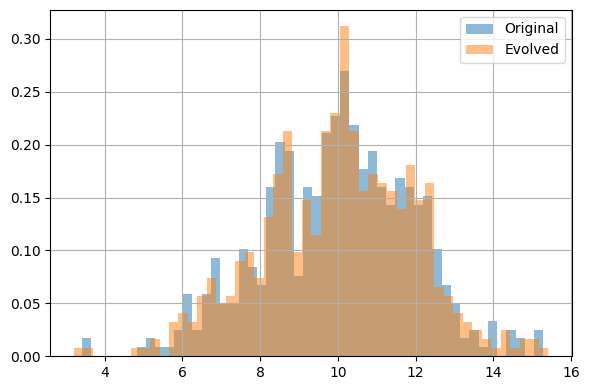

step 1200 | loss = 0.000293 | mu = 10.6124 | var = 3.2361


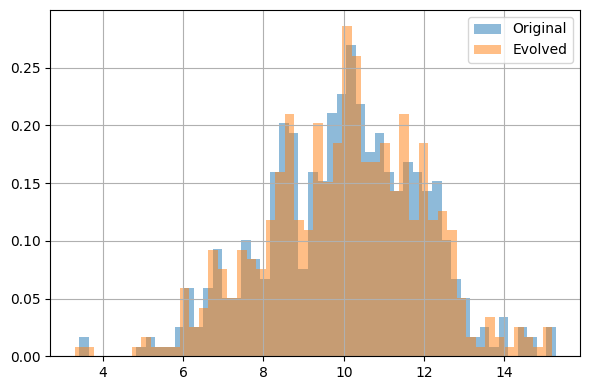

step 1210 | loss = 0.000472 | mu = 10.5582 | var = 3.1938


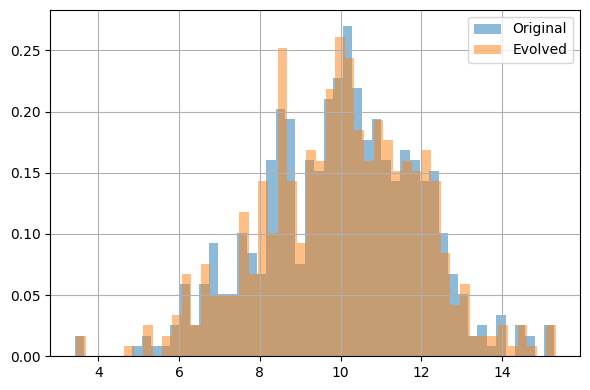

step 1220 | loss = 0.000734 | mu = 10.1971 | var = 3.2105


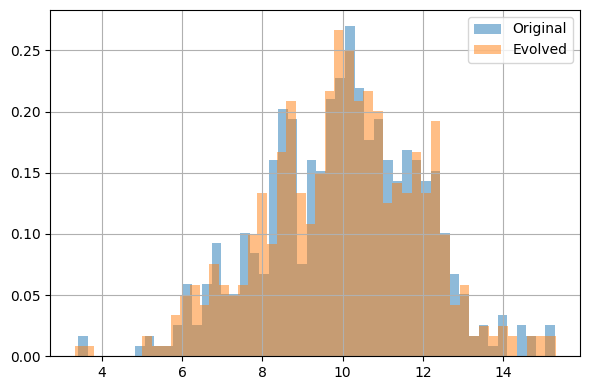

step 1230 | loss = 0.000887 | mu = 9.9060 | var = 3.1931


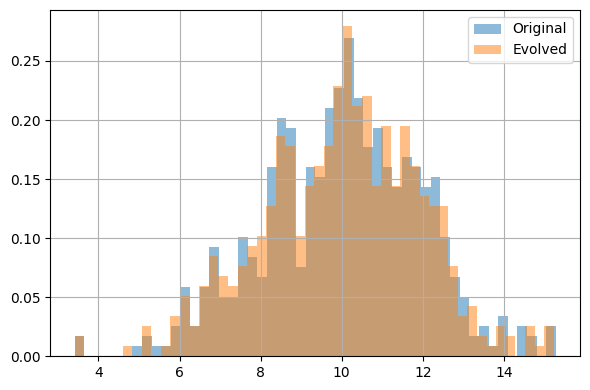

step 1240 | loss = 0.000667 | mu = 10.5323 | var = 3.1129


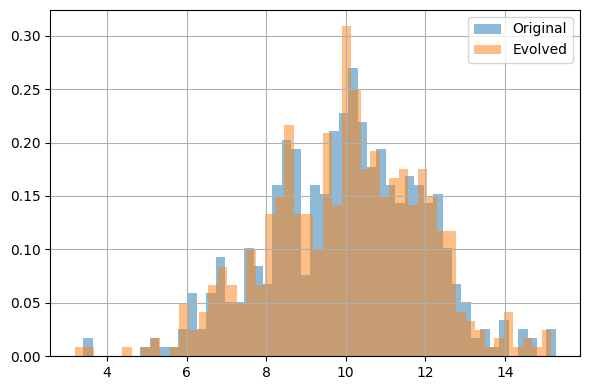

step 1250 | loss = 0.000486 | mu = 10.2736 | var = 3.0511


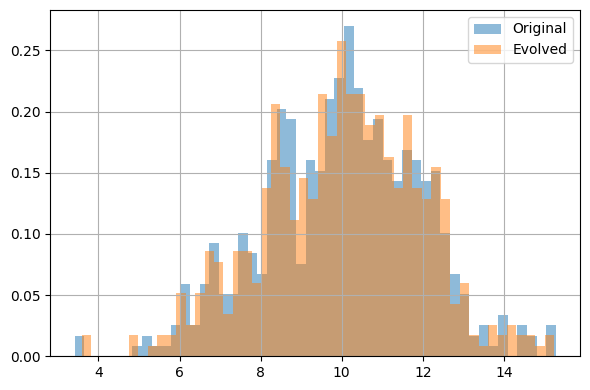

step 1260 | loss = 0.000471 | mu = 10.2342 | var = 2.9971


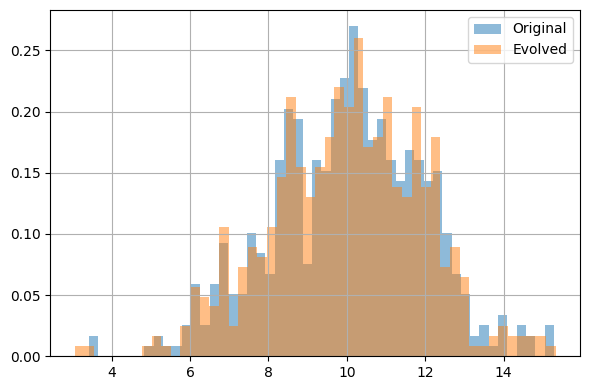

step 1270 | loss = 0.000889 | mu = 10.2108 | var = 2.9741


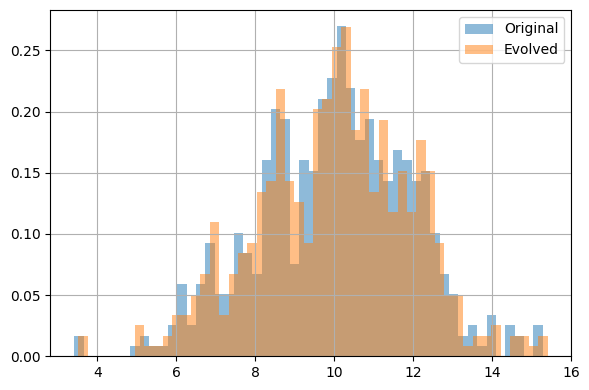

step 1280 | loss = 0.000769 | mu = 10.3167 | var = 3.0276


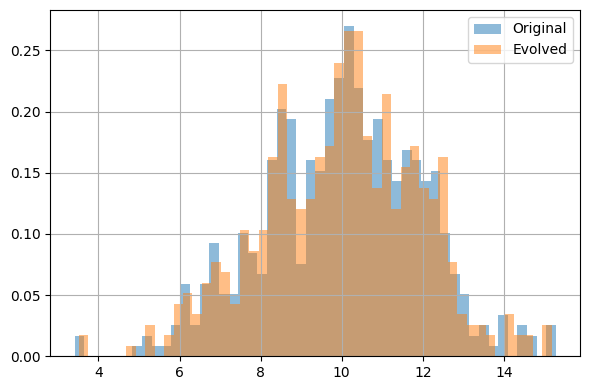

step 1290 | loss = 0.000358 | mu = 10.9110 | var = 2.9943


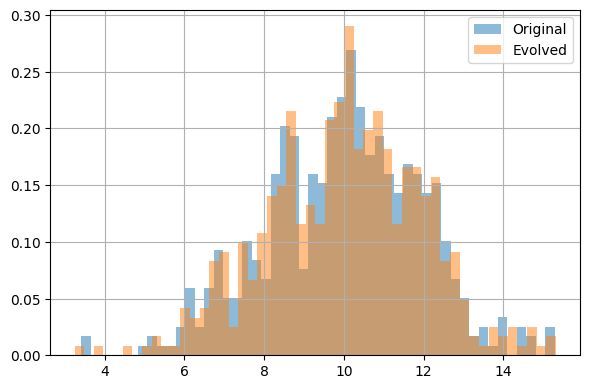

step 1300 | loss = 0.000303 | mu = 11.1836 | var = 2.9640


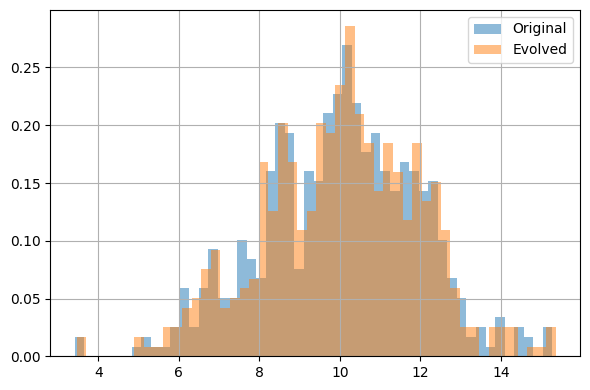

step 1310 | loss = 0.000508 | mu = 11.2890 | var = 3.0111


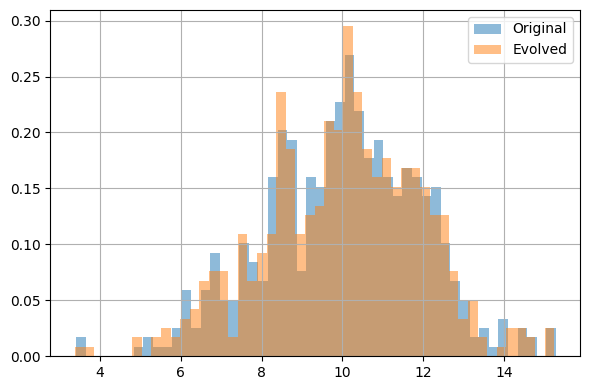

step 1320 | loss = 0.000367 | mu = 10.8278 | var = 3.0214


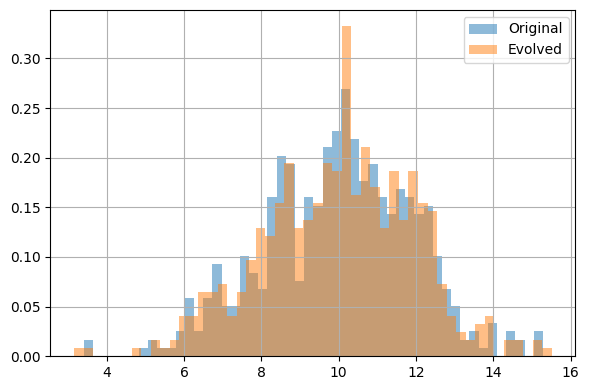

step 1330 | loss = 0.000616 | mu = 10.1137 | var = 2.9778


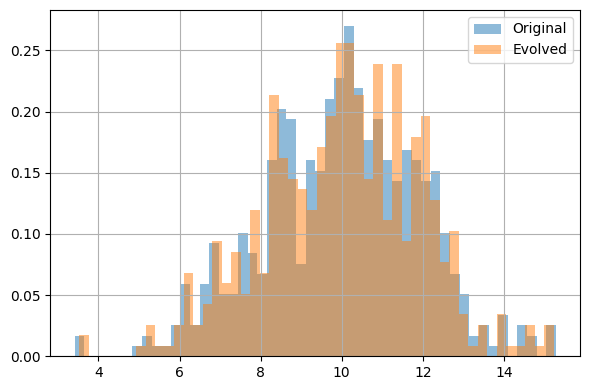

step 1340 | loss = 0.000623 | mu = 9.9281 | var = 3.0278


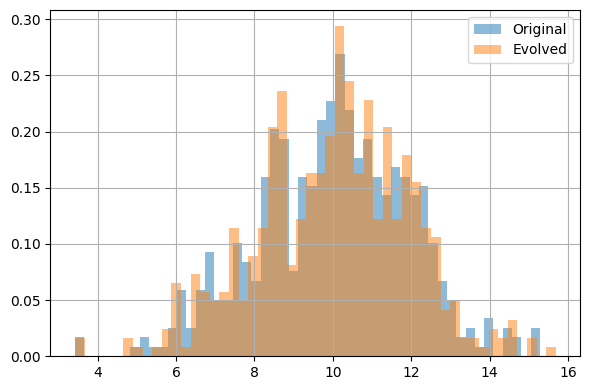

step 1350 | loss = 0.000413 | mu = 9.8398 | var = 3.0186


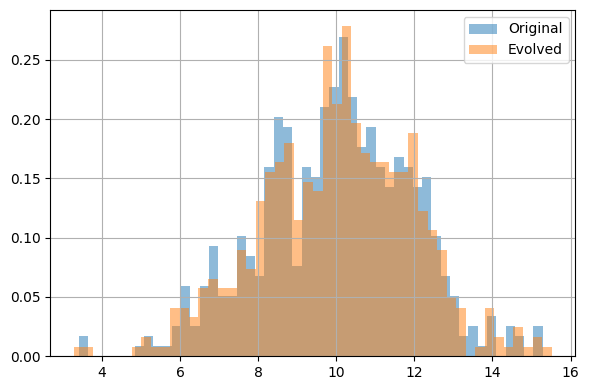

step 1360 | loss = 0.000286 | mu = 9.5214 | var = 2.9119


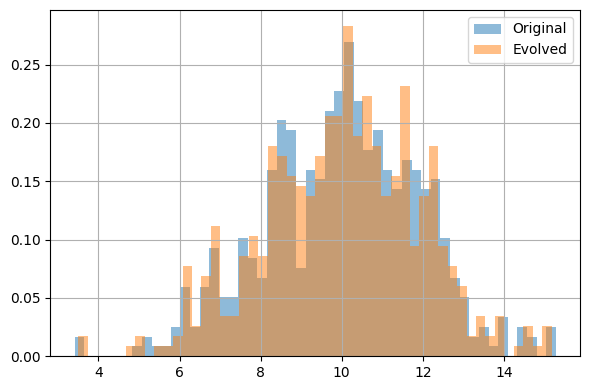

step 1370 | loss = 0.000637 | mu = 10.5125 | var = 2.8948


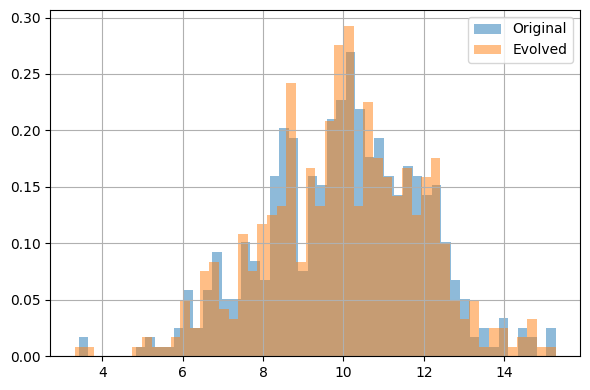

step 1380 | loss = 0.000328 | mu = 10.8540 | var = 2.9009


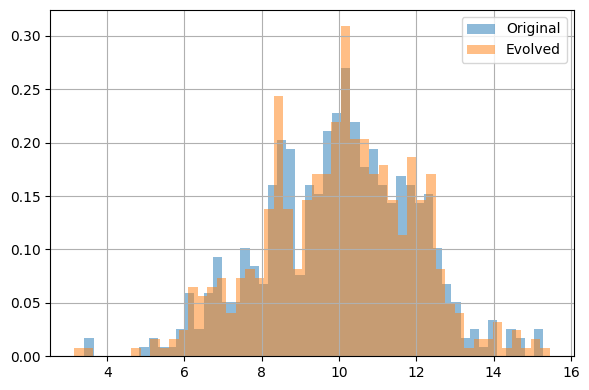

step 1390 | loss = 0.000462 | mu = 10.3018 | var = 2.8747


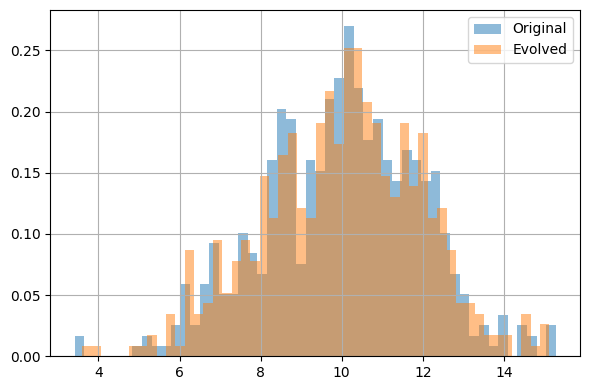

step 1400 | loss = 0.000664 | mu = 10.0379 | var = 2.8674


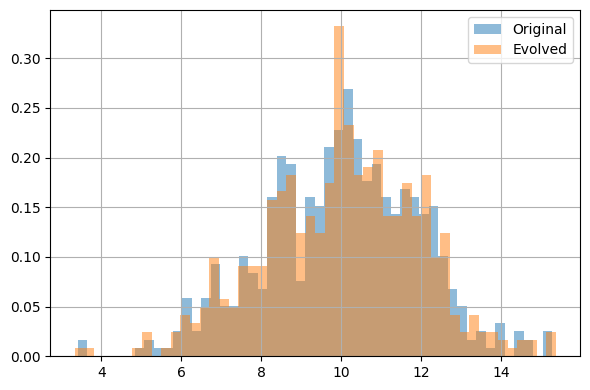

step 1410 | loss = 0.000168 | mu = 10.5154 | var = 2.8321


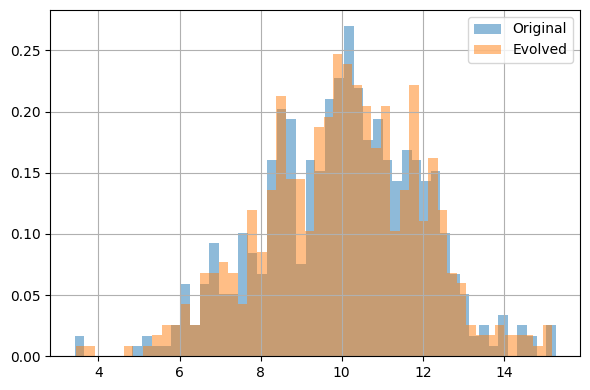

step 1420 | loss = 0.000538 | mu = 10.8183 | var = 2.8341


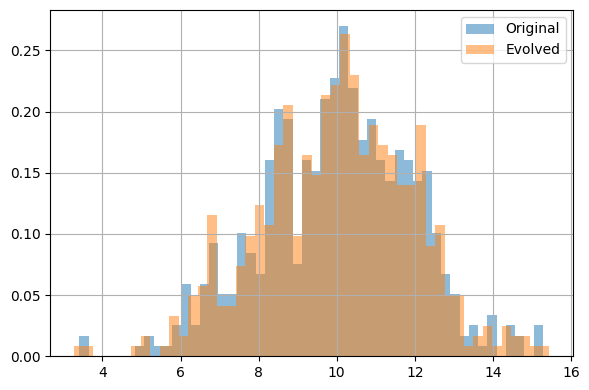

step 1430 | loss = 0.000411 | mu = 10.1287 | var = 2.9688


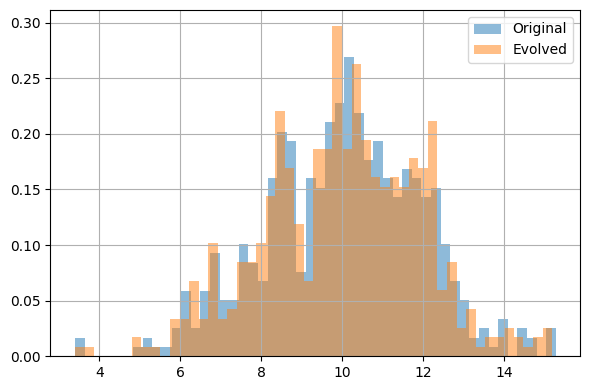

step 1440 | loss = 0.000849 | mu = 9.5135 | var = 3.0028


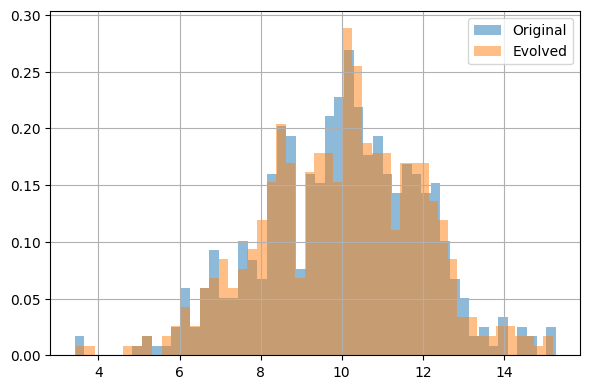

step 1450 | loss = 0.001003 | mu = 9.8713 | var = 3.0013


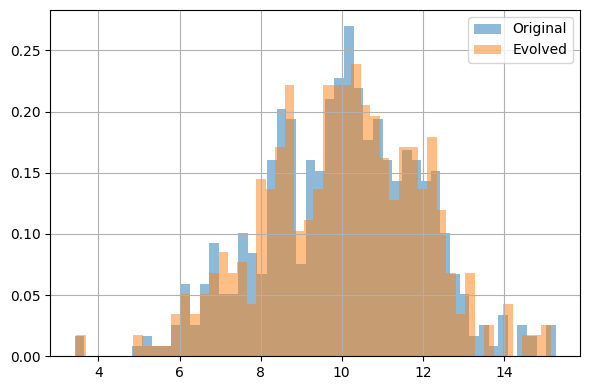

step 1460 | loss = 0.000371 | mu = 11.2257 | var = 2.9438


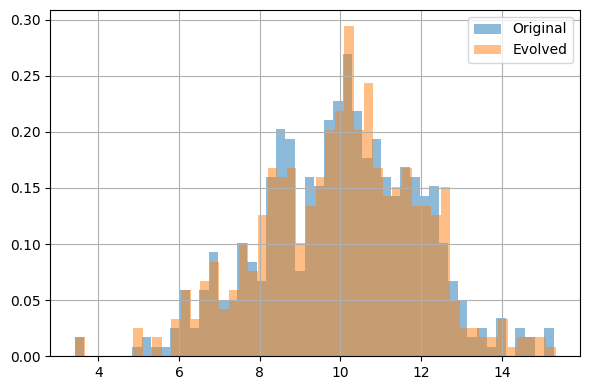

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x10756da90>>
Traceback (most recent call last):
  File "/Users/lucaraffo/CFM/cfm_env/lib/python3.13/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


step 1470 | loss = 0.000296 | mu = 10.8971 | var = 3.0361


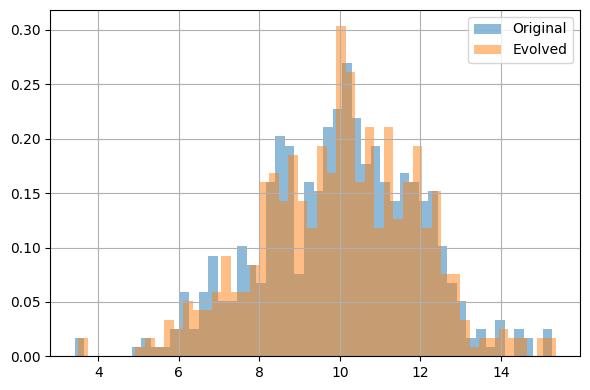

step 1480 | loss = 0.000729 | mu = 10.0333 | var = 3.1951


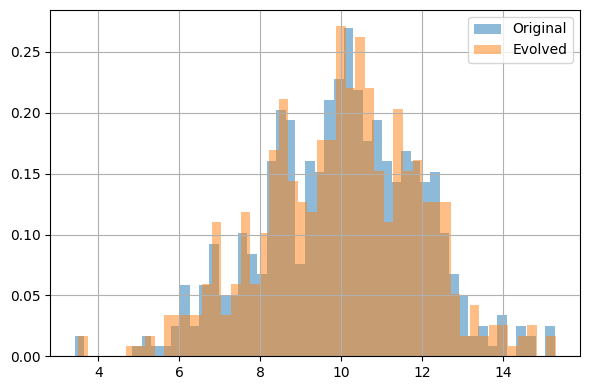

step 1490 | loss = 0.000638 | mu = 10.4416 | var = 3.2512


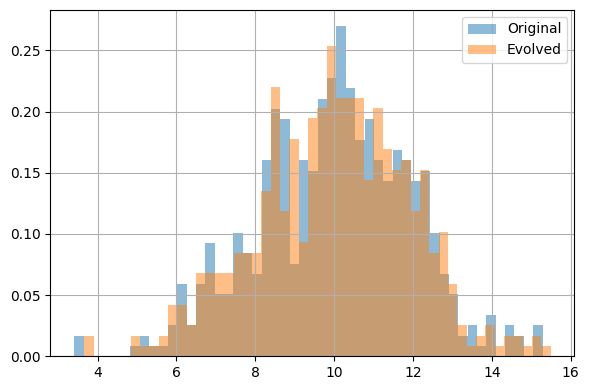

step 1500 | loss = 0.000715 | mu = 10.4937 | var = 3.1606


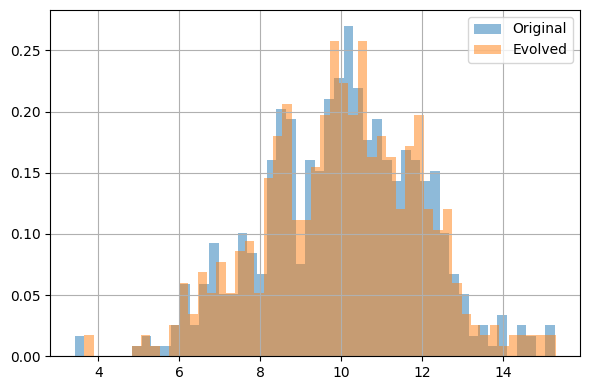

In [ ]:
true_mu, true_std = 10.0, 2.0
key = jax.random.PRNGKey(0)

samples = jax.random.normal(key, shape=(500,)) * true_std + true_mu

theta_hat = lm_optimize(samples, n_epochs=5000, lr=0.5)

print(f"final mean:     {theta_hat[0]:.4f}")
print(f"final variance: {theta_hat[1]:.4f}")